# Bushfire Analysis using Meteorological Data
(under the Theme of IT for Social Good)

Created by: *__Rakesh Nain__*

## Table of Contents

1. Introduction
2. Data Exploration
3. Model Development
4. Model Comparison
5. Variable Identification and Explanation
6. Conclusion
7. References

## 1. Introduction
In later 2019 and early 2020, Australia faced devastating bushfires started in
late 2019, which swiftly got worse before rains helped contain many of the
worst fires in February 2020. Bushfires are major environmental issues, creating
economical and ecological damages. It is reported that Australia’s catastrophic
bushfire crisis has destroyed thousands of homes, burned millions hectares of
forest, and taken an enormous toll on wildlife. Therefore, fast and automatic
detection of bushfires at an early stage is crucial for a successful firefighting.

Traditional human surveillance is expensive and inefficient, which can also
be affected by subject factors. With the advances in information technologies, a
variety of data about the forest can be collected, such as remote images collected
by satellites and meteorological data collected by local sensors. The collected
data contains rich information about the status of the forest, the analysis of
which can help us detect potential bushfires so as to make effective and efficient
firefighting plan and then minimize the damage caused by the bushfires.

In this project, we are interested in exploring machine learning approaches
to predict the burned area of bushfires by using meteorological data that are
known to influence the wild fires. The dataset that we are going to use here were
originally collected from the northeast region of Portugal between January 2000
and December 2003. It contains geographical information, fire weather indices,
and the corresponding weather conditions. The aim is to build statistical models 
that can predict the burned area of the bushfires. 

Specifically, the problem this project is going to solve is:
- accurately predict the burned area of a bushfire given the collected data?

        For our prediction task, we will look at the first 12 columns to predict the last column area . In order to do
        so, we will split the data into training dataset (80%) and testing dataset (20%) before modelling the data. We
        will then fit the models to the training dataset, look at how well it performs on the testing dataset and assess
        the model based on performance metrics. In order to complete this task, we will develop three models for
        comparison. We will conclude by justifying the best model through analysis of our results.
    
    
- well explain your prediction and the associated findings? For example,
    identify the key factors are strongly associated with the response variable,
    i.e., the burned area.
    
        For our description task, we will identify the key factors that have a strong effect on the burned areas. In
        other words, we will focus on which attributes have the highest contribution to our model's performance. We
        will analyse this by using variable correlation analysis, regression equations and other statistical analysis
        (such as p-values). We will interpret the results and look at why certain attributes have certain impacts on the
        prediction.

### Dataset
The dataset contains 517 fire instances, each of which have 13 columns: the first
12 columns corresponding to the attributes (e.g., spatial coordinates, month,
day, four fire indices, and other meteorological data) and the last column containing the burned area, i.e., the variable that we will predict. The details of
the dataset can be found in the [original research paper](http://www3.dsi.uminho.pt/pcortez/fires.pdf). The dataset files are
stored in UCI’s website below (click the hyper-link to download the data)

- [__Forest fires data__](https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/) : There are two files on the website. One called “forestfires.csv” contains the data needed for the analysis, and another called
“forestfires.names” contains the information about the dataset.

Programming Language: R 3.5.1 in Jupyter Notebook

R Libraries used:

- library(lattice)
- library (GGally)
- library(psych)
- library(reshape2)
- library(RColorBrewer)
- library(car)
- library(dummies)
- library(plyr)
- library(glmnet)
- library(randomForest)
- library(mlbench)
- library(caret)
- library(leaps)
- library(gridExtra)
- library(scatterplot3d)

We will start by loading all required libraries.

In [10]:
# install.packages("scatterplot3d")

Installing package into 'C:/Users/iamra/OneDrive/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'scatterplot3d' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\iamra\AppData\Local\Temp\RtmpqAXPbg\downloaded_packages


In [13]:
#import all libraries here
library(lattice)
library (GGally)
library(psych)
library(reshape2)
library(RColorBrewer)
library(car)
library(dummies)
library(plyr)
library(glmnet)
library(randomForest)
library(mlbench)
library(caret)
library(leaps)
library(gridExtra)
library(scatterplot3d)

After loading the libraries, we can read our data and check whether it has been read correctly.

In [14]:
fires = read.csv("./forestfires.csv")
head(fires) #check first few rows

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
2,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
3,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
6,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


In [15]:
tail(fires) #check last few rows

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
512,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0,0.00
513,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0,6.44
514,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0,54.29
515,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0,11.16
516,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0,0.00
517,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0,0.00


## 2. Data Exploration

From exploring our data, we hope to:
- Find out the distribution of our data
- Check if our data is imbalanced (i.e. big difference between positive and negative values)
- Look for any outliers

To achieve this, we will use data exploration and we will do data exploration using the following graphs:
- Boxplots
- Histograms
- Density plots
- Scatterplots
- Correlation matrix

Let's begin by exploring the dimensions of our dataframe.

In [16]:
dim(fires) #to find out the number of rows and columns

[1] 517  13

This tells us that there are 517 observations and 13 columns/attributes. Next, we can use the str()
function to look at the structure.

In [17]:
str(fires)

'data.frame':	517 obs. of  13 variables:
 $ X    : int  7 7 7 8 8 8 8 8 8 7 ...
 $ Y    : int  5 4 4 6 6 6 6 6 6 5 ...
 $ month: chr  "mar" "oct" "oct" "mar" ...
 $ day  : chr  "fri" "tue" "sat" "fri" ...
 $ FFMC : num  86.2 90.6 90.6 91.7 89.3 92.3 92.3 91.5 91 92.5 ...
 $ DMC  : num  26.2 35.4 43.7 33.3 51.3 ...
 $ DC   : num  94.3 669.1 686.9 77.5 102.2 ...
 $ ISI  : num  5.1 6.7 6.7 9 9.6 14.7 8.5 10.7 7 7.1 ...
 $ temp : num  8.2 18 14.6 8.3 11.4 22.2 24.1 8 13.1 22.8 ...
 $ RH   : int  51 33 33 97 99 29 27 86 63 40 ...
 $ wind : num  6.7 0.9 1.3 4 1.8 5.4 3.1 2.2 5.4 4 ...
 $ rain : num  0 0 0 0.2 0 0 0 0 0 0 ...
 $ area : num  0 0 0 0 0 0 0 0 0 0 ...


From the above table, we can see that there are no missing values so imputation will not be required.
In order to understand each attribute, we have taken definitions and descriptions directly from
http://www3.dsi.uminho.pt/pcortez/fires.pdf (http://www3.dsi.uminho.pt/pcortez/fires.pdf) and the Sasquatch
Station website

- X: x-axis values where the fire occured
- Y: y-axis values where the fire occured
- month: month of forest fire
- day: day of the week of forest fire
- FFMC (Fine Fuel Moisture Code): represents the moisture content surface litter and influences ignition of
  fire spread
- DMC (Duff Moisture Code): represents the moisture content of shallow and deep organic layers, which
  affect fire intensity
- DC (Drought Code): also represents the moisture content of shallow and deep organic layers, which
  affect fire intensity
- ISI (Initial Spread Index): score that correlates with fire velocity spread. This tells the rate at which the
  fire will spread in the initial stage. It is calculated using the FFMC and wind factor.
- temp: outside temperature (in degree Celcius)
- RH (Relative Humidity): outside relative humidity (in %)
- wind: outside wind speed (in km/h)
- rain: outside rain (in mm/m\^2)
- area: total burned area (in ha)

For this task, we are interested in predicting the burned area .

We can use the summary() function to see if we can make any interesting observations. This calculates the
descriptive statistics such as minimum, maximum, mean, median and quantiles, which allows us the see the
range for each attribute.

http://www.sasquatchstation.com/Fire_Weather.php (http://www.sasquatchstation.com/Fire_Weather.php)

In [18]:
summary(fires)

       X               Y          month               day           
 Min.   :1.000   Min.   :2.0   Length:517         Length:517        
 1st Qu.:3.000   1st Qu.:4.0   Class :character   Class :character  
 Median :4.000   Median :4.0   Mode  :character   Mode  :character  
 Mean   :4.669   Mean   :4.3                                        
 3rd Qu.:7.000   3rd Qu.:5.0                                        
 Max.   :9.000   Max.   :9.0                                        
      FFMC            DMC              DC             ISI        
 Min.   :18.70   Min.   :  1.1   Min.   :  7.9   Min.   : 0.000  
 1st Qu.:90.20   1st Qu.: 68.6   1st Qu.:437.7   1st Qu.: 6.500  
 Median :91.60   Median :108.3   Median :664.2   Median : 8.400  
 Mean   :90.64   Mean   :110.9   Mean   :547.9   Mean   : 9.022  
 3rd Qu.:92.90   3rd Qu.:142.4   3rd Qu.:713.9   3rd Qu.:10.800  
 Max.   :96.20   Max.   :291.3   Max.   :860.6   Max.   :56.100  
      temp             RH              wind            

To analyse more detailed statistics (such as standard deviation, standard error and range), we will use the
psych library for further analysis

In [19]:
round(describe(fires),3)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,517,4.669,2.314,4.00,4.672,2.965,1.0,9.00,8.00,0.036,-1.180,0.102
Y,2,517,4.300,1.230,4.00,4.308,1.483,2.0,9.00,7.00,0.415,1.378,0.054
month*,3,517,6.758,4.373,7.00,6.720,7.413,1.0,12.00,11.00,0.084,-1.719,0.192
day*,4,517,3.737,1.925,4.00,3.672,2.965,1.0,7.00,6.00,0.157,-1.109,0.085
FFMC,5,517,90.645,5.520,91.60,91.455,1.927,18.7,96.20,77.50,-6.537,66.139,0.243
DMC,6,517,110.872,64.046,108.30,106.522,51.743,1.1,291.30,290.20,0.544,0.179,2.817
DC,7,517,547.940,248.066,664.20,578.692,118.905,7.9,860.60,852.70,-1.094,-0.265,10.910
ISI,8,517,9.022,4.559,8.40,8.727,3.113,0.0,56.10,56.10,2.522,21.146,0.201
temp,9,517,18.889,5.807,19.30,19.091,5.337,2.2,33.30,31.10,-0.329,0.111,0.255


From the above tables, we can make the below observations:
- area and DC have the largest range. DMC also has quite a big range.
- DC also has the highest standard error and standard deviation. According to the Sasquatch Station
website, an extreme level is 360+. From our table, the max for Drought Code reaches 860.6, which must
be very extreme
- The minimum value for area is 0. In this case, 0 means that an area with less than 100m^2 was
burned. The median is 0.52, with a max of 1090.84. This tells us that more values are skewed toward
zero.
- The range for rain is quite small - between 0 and 6.4. This tells us that there must not be a lot of rain
in these areas.
- The max wind speed per hour is 9.4km/hour
- Relative Humidity is recorded as a percentage. We can see that the max is 100 so we know that it
reaches the maximum possible value in this category.
- temp is measured in degrees Celsius. The lowest temperature recorded is 2.2 and the highest is 33.3
with an average of almost 19 degrees.
- For ISI , the min is 0, which indicates a very low spread of fire in the early stages. According to the
Sasquatch Station website, any ratings over 19 represents a rapid spread. The maximum rating for this
is 56.10, which tells us that the speed of the spread can be extremely fast.
- X has coordinates between 1-9, while Y have coordinates between 2-9
- month has a range between 1-12, while day has a range between 1-7

http://www.sasquatchstation.com/Fire_Weather.php (http://www.sasquatchstation.com/Fire_Weather.php)

The table also shows the kurtosis and skew for each variable. We will plot the distribution of each variable
and analyse this further below.

##### Boxplots
Now that we have a better understanding of our data, we can start at looking at the distribution of each
variable.

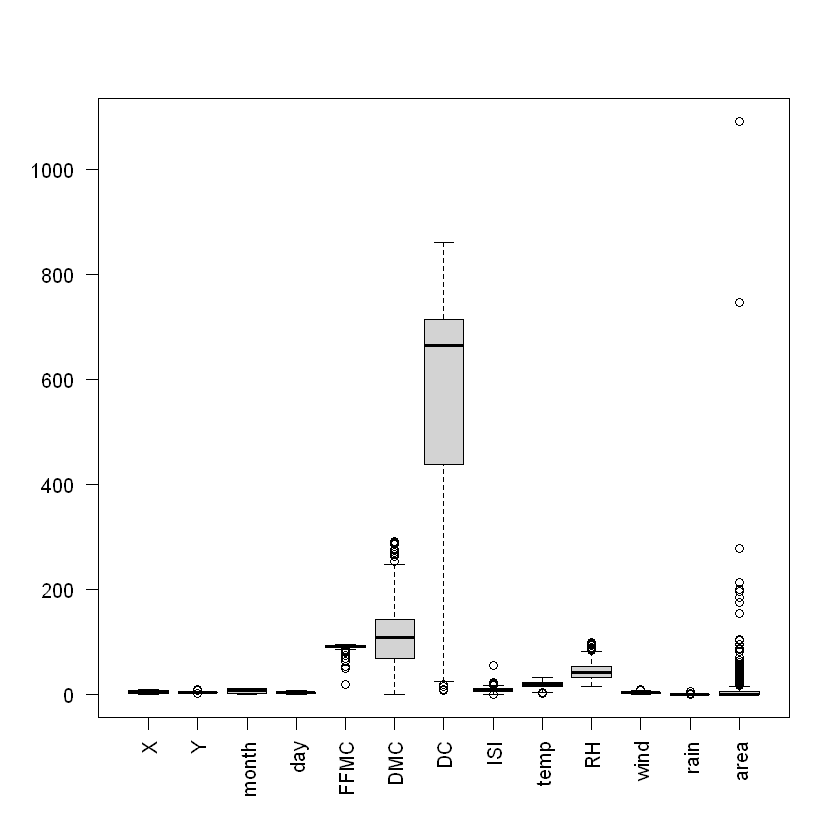

In [24]:
fires$month <- as.factor(fires$month)
fires$day <- as.factor(fires$day)

# plot boxplot of all variables
boxplot(fires, las=2, cex.axis = 1)

It is hard to see the distribution for many of the variables above. This is due to the difference in scales and
range. To adjust this, we will plot each boxplot in a loop with an adjusted scales.

Using month, day as id variables



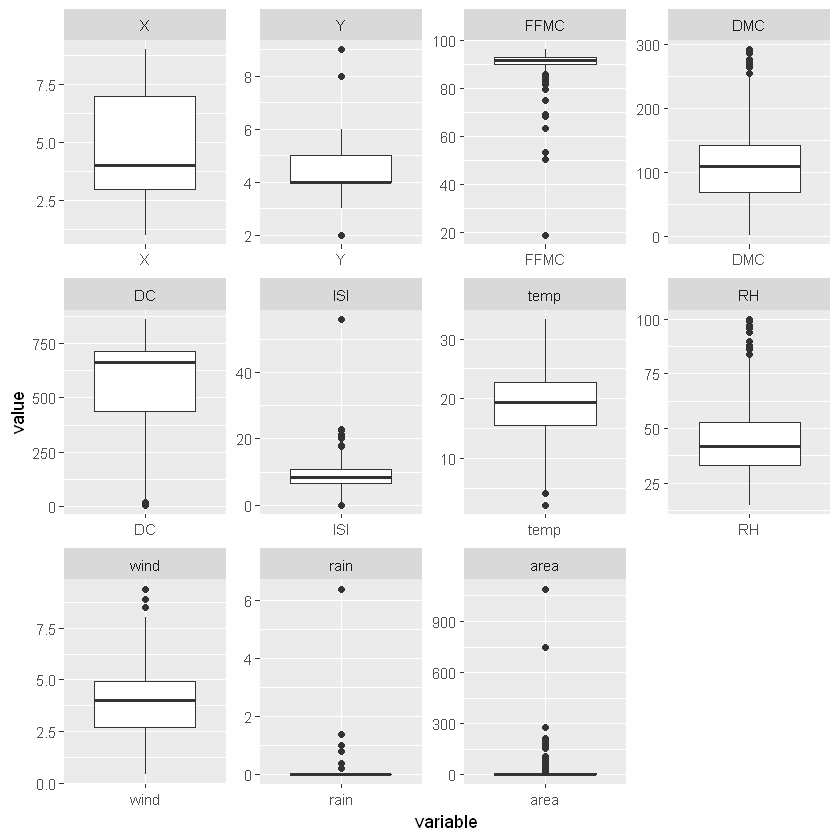

In [25]:
m1 <- melt(as.data.frame(fires))
ggplot(m1,aes(x = variable,y = value)) +
facet_wrap(~variable, scales="free") + #graph all variables on an adjusted scale
geom_boxplot() +
scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

We can see big outliers for area, rain and ISI.

As month and day are 'factors', we were not able to generate a boxplot for these two variables. We also
noticed that the month and days are currently in alphabetical order. We will change this to the align with the
calendar year in order for the analysis to be more meaningful. This will make it easier for us to understand
the data.

In [26]:
#re-order month and day to reflect calendar
fires$month = factor(fires$month, levels=c("jan", "feb", "mar", "apr","may","jun","jul","aug", "sep", "oct", "nov", "dec"),
labels=c("jan", "feb", "mar", "apr", "may","jun","jul","aug", "sep", "oct", "nov", "dec"))

fires$day = factor(fires$day, levels=c("sun","mon", "tue", "wed", "thu","fri","sat"),
labels=c("sun","mon", "tue", "wed", "thu", "fri","sat"))

In [27]:
#convert to numeric data types
fires$month <- as.numeric(fires$month)
fires$day <- as.numeric(fires$day)


No id variables; using all as measure variables



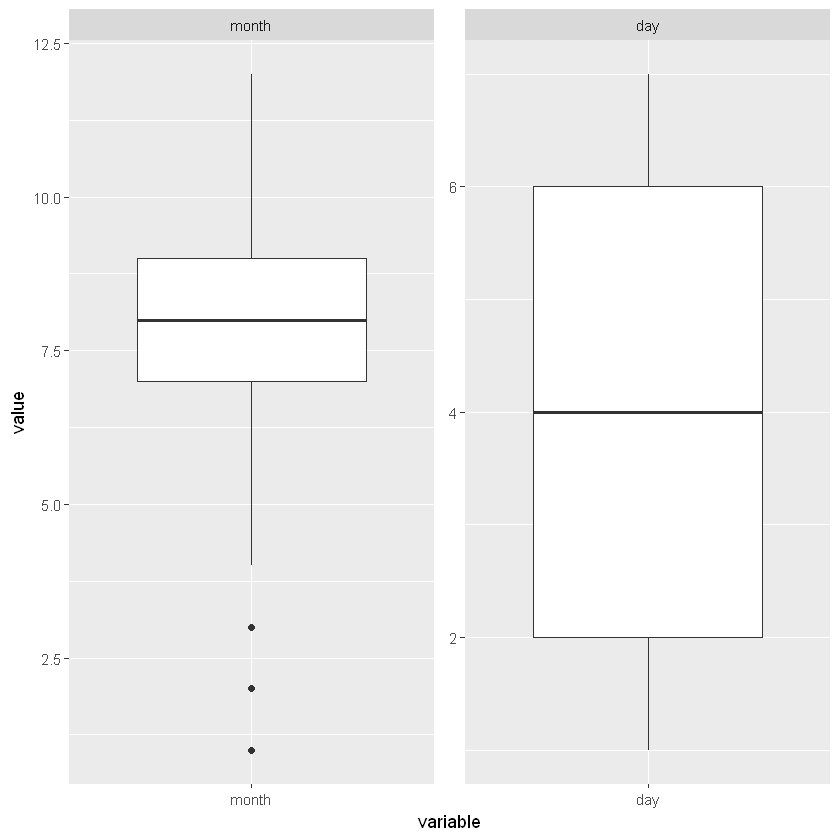

In [28]:
#graph the month and day boxplots as they were missing above
m1 <- melt(as.data.frame(fires[,c(3,4)]))
ggplot(m1,aes(x = variable,y = value)) +
facet_wrap(~variable, scales="free") + #graph all variables on an adjusted scale
geom_boxplot() +
scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})


We can see some outliers for month . The median for month is around 8, which tells us that fires are more
frequent in the second half of the year.

##### Histograms and density plots
Histograms and density plots are also another great way to visualise distributions. We will plot both these for
all variables below

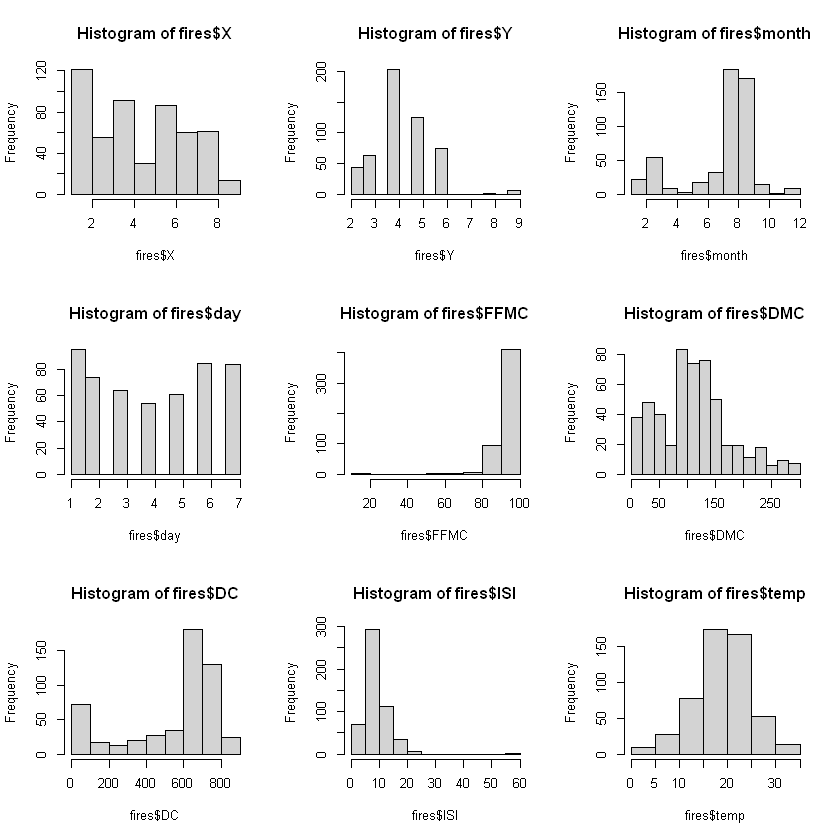

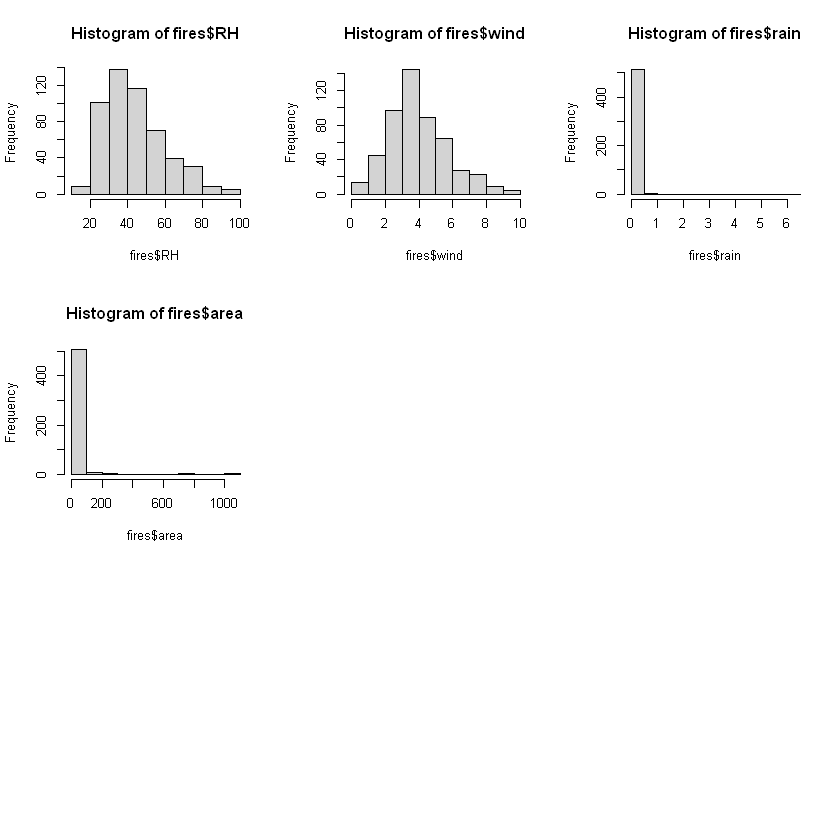

In [29]:
#plot histograms
par(mfrow = c(3,3))
hist(fires$X)
hist(fires$Y)
hist(fires$month)
hist(fires$day)
hist(fires$FFMC)
hist(fires$DMC)
hist(fires$DC)
hist(fires$ISI)
hist(fires$temp)
hist(fires$RH)
hist(fires$wind)
hist(fires$rain)
hist(fires$area)

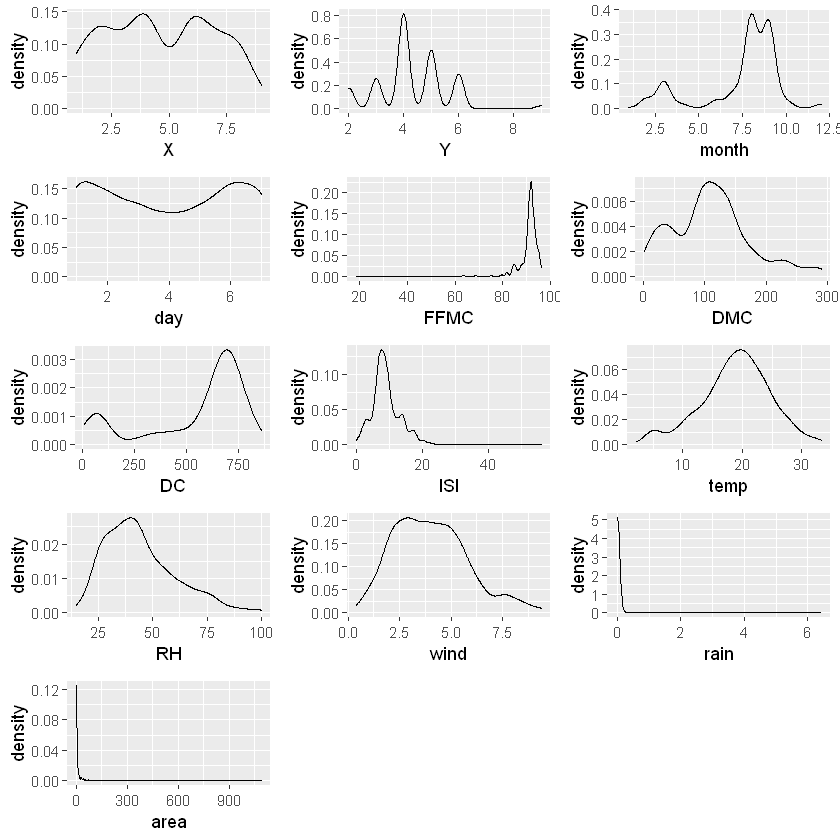

In [30]:
#plot density graphs
a<-ggplot(fires, aes(x=X)) + geom_density()
b<-ggplot(fires, aes(x=Y)) + geom_density()
c<-ggplot(fires, aes(x=month)) + geom_density()
d<-ggplot(fires, aes(x=day)) + geom_density()
e<-ggplot(fires, aes(x=FFMC)) + geom_density()
f<-ggplot(fires, aes(x=DMC)) + geom_density()
g<-ggplot(fires, aes(x=DC)) + geom_density()
h<-ggplot(fires, aes(x=ISI)) + geom_density()
i<-ggplot(fires, aes(x=temp)) + geom_density()
j<-ggplot(fires, aes(x=RH)) + geom_density()
k<-ggplot(fires, aes(x=wind)) + geom_density()
l<-ggplot(fires, aes(x=rain)) + geom_density()
m<-ggplot(fires, aes(x=area)) + geom_density()
grid.arrange(a,b,c,d,e,f,g,h,i,j,k,l,m, ncol=3) #arrange our ggplots

We can make the below observations from the histograms and density plots above:

- The values for rain , ISI and area are positively skewed
- The values for FFMC is negatively skewed
- Fires are more frequent in the second half of the year, especially between July to September. We can
also see an imbalance of data for some months - in particular November and April are not being
represented as much as the other months.
- Fires also occur more often from Friday to Sunday when compared to Monday to Thursday. However,
there is no real pattern for this.
- temp and wind have relatively normal distributions
- Most fires occured between the Y coordinates 3-6. Y is also missing values such as 1 and 7 from its
range
- There is no distinguisable pattern for the X coordinate, however we can see the majority of values lie at
coordinate 1

Visualising transformed variables

Regression models can make better predictions if the input and target variables are normally distributed.

In order to achieve a more normal distribution, we can replot the graphs with positive skews with a log-scale
to see if there is a log-normal distribution. Below, we will investigate rain , ISI and area in more detail.

https://towardsdatascience.com/top-3-methods-forhandling-skewed-data-1334e0debf45
(https://towardsdatascience.com/top-3-methods-forhandling-skewed-data-1334e0debf45)

We can start by looking at area . We will firstly plot the distribution of the original variable and then graph
the log function next to it to see if there is any improvement in the distribution.

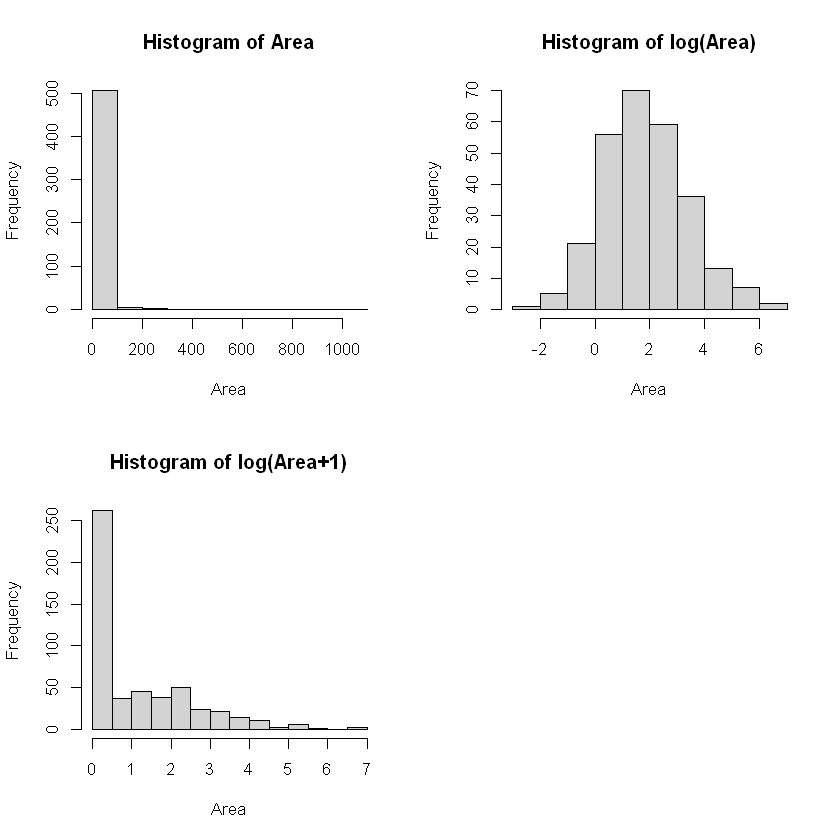

In [31]:
#plot variations of area
par(mfrow = c(2,2))
hist(fires$area, xlab = "Area", main="Histogram of Area")
hist(log(fires$area), xlab = "Area", main="Histogram of log(Area)")
hist(log(fires$area +1), xlab = "Area", main="Histogram of log(Area+1)")

Applying the 'log' function to area helps to normalise the distribution. However, we get some negative
values. As a negative area does not make sense, we can add 1 to combat this problem. The graph for
log(area+1) looks a lot better.

We will do the same for the rain variable.

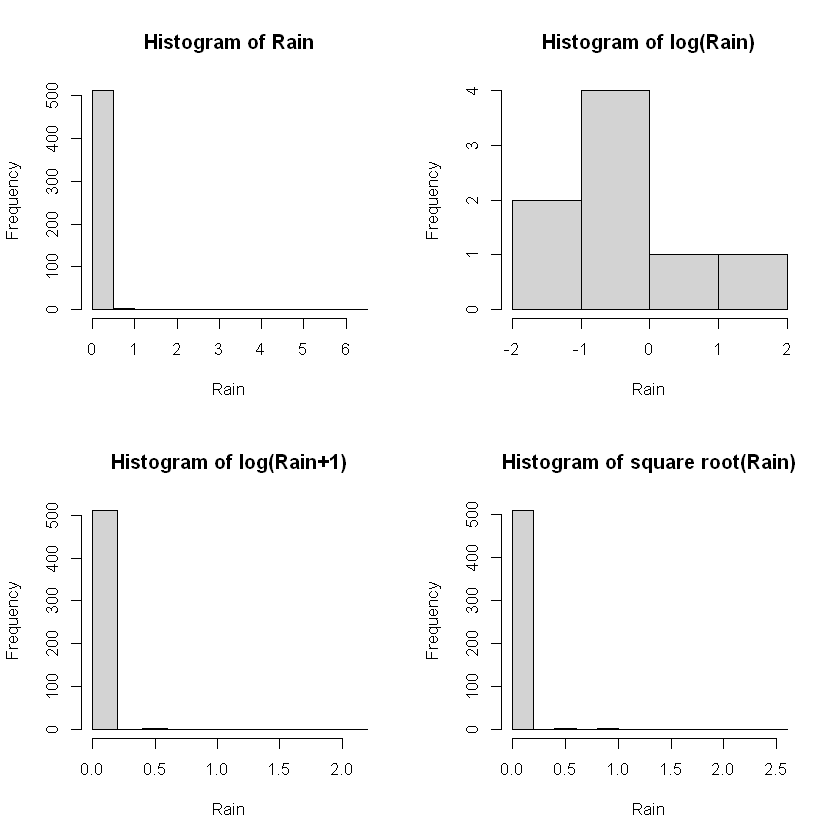

In [32]:
#plot variations of rain
par(mfrow = c(2,2))
hist(fires$rain, xlab = "Rain", main="Histogram of Rain")
hist(log(fires$rain), xlab = "Rain", main="Histogram of log(Rain)")
hist(log(fires$rain+1), xlab = "Rain", main="Histogram of log(Rain+1)")
hist(sqrt(fires$rain), xlab = "Rain", main="Histogram of square root(Rain)")

Even though applying the 'log' function normalises our rain variable, we get some negative values. As
negative rain also does not make sense, we can add 1 to get rid of this problem. However, in the third graph,
we can see that the distribution becomes very similar to our first histogram for rain - the only difference is that
our range is smaller. We also tried applying the square root function but this is not any better. There is not
much improvement for this transformed variable.

Lastly, we will look at ISI .

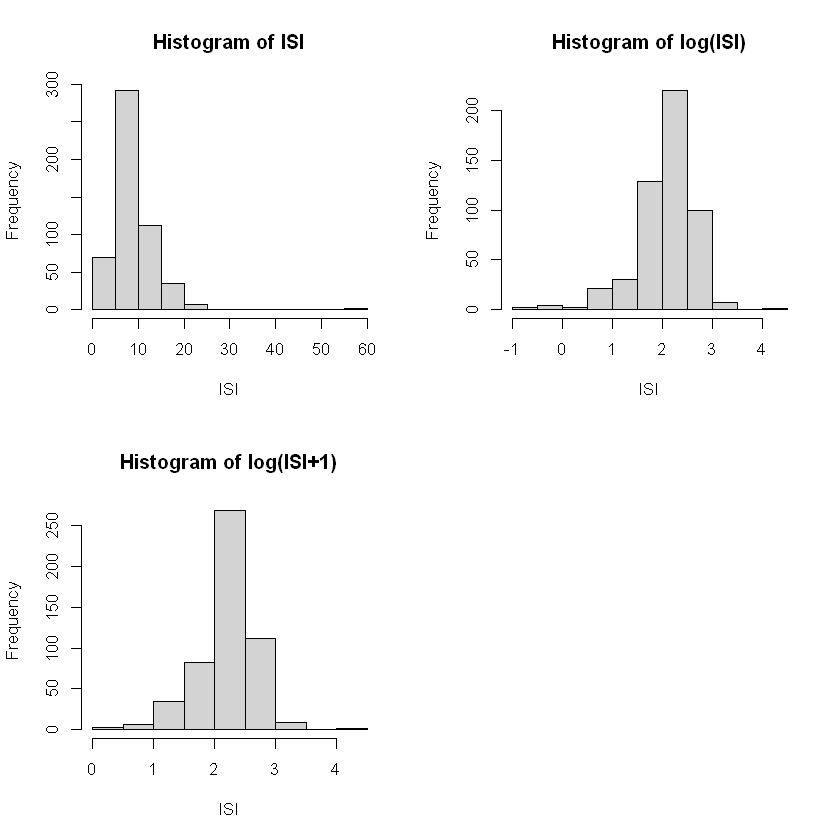

In [33]:
#plot variations of ISI
par(mfrow = c(2,2))
hist(fires$ISI, xlab = "ISI", main="Histogram of ISI")
hist(log(fires$ISI), xlab = "ISI", main="Histogram of log(ISI)")
hist(log(fires$ISI+1), xlab = "ISI", main="Histogram of log(ISI+1)")

Similarly to area and rain , we have graphed the log of ISI and log(ISI+1) . ISI represents the
index of the initial spread, which should start from 0. In this case, log(ISI+1) make sense and creates a
more log normal distribution.

As we discussed above, FFMC also has a large negative skew. We will plot this in a couple of different ways
to try and understand this better.

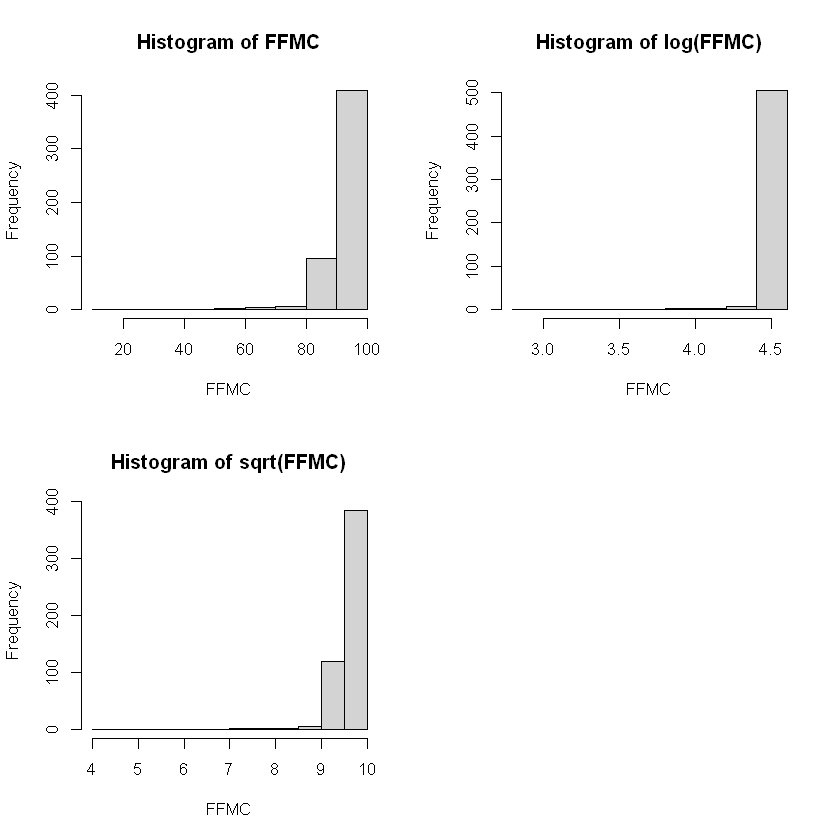

In [34]:
#plot variations of FFMC
par(mfrow = c(2,2))
hist(fires$FFMC, xlab = "FFMC", main="Histogram of FFMC")
hist(log(fires$FFMC), xlab = "FFMC", main="Histogram of log(FFMC)")
hist(sqrt(fires$FFMC), xlab = "FFMC", main="Histogram of sqrt(FFMC)")

The square root of FFMC maintains its underlying distribution, while reducing the range. As we saw above
when we plotted the boxplot, there was one big outlier for FFMC . We can plot this again below to see if there
is any improvement.

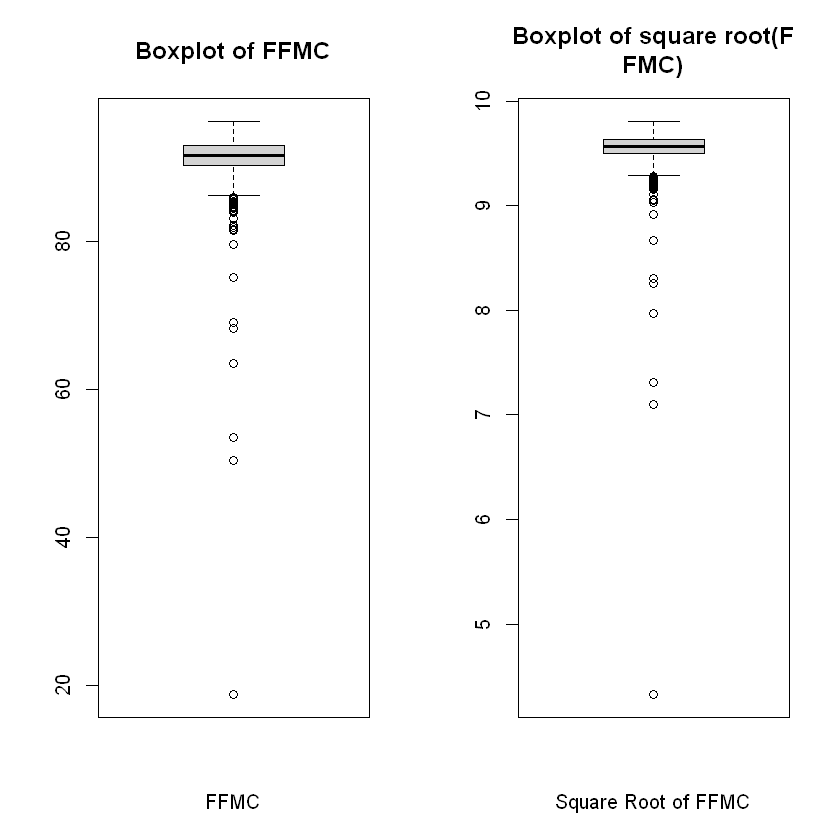

In [35]:
#plot variations of FFMC
par(mfrow = c(1,2))
boxplot(fires$FFMC, xlab = "FFMC", main="Boxplot of FFMC")
boxplot(sqrt(fires$FFMC), xlab = "Square Root of FFMC", main="Boxplot of square root(F
FMC)")

As noted above, DC recorded a large range, as well as the highest standard error and standard deviation
out of all of our variables. If we apply a square root, we can reduce the range while maintaining its underlying
distribution. We can graph this below to see its effects.

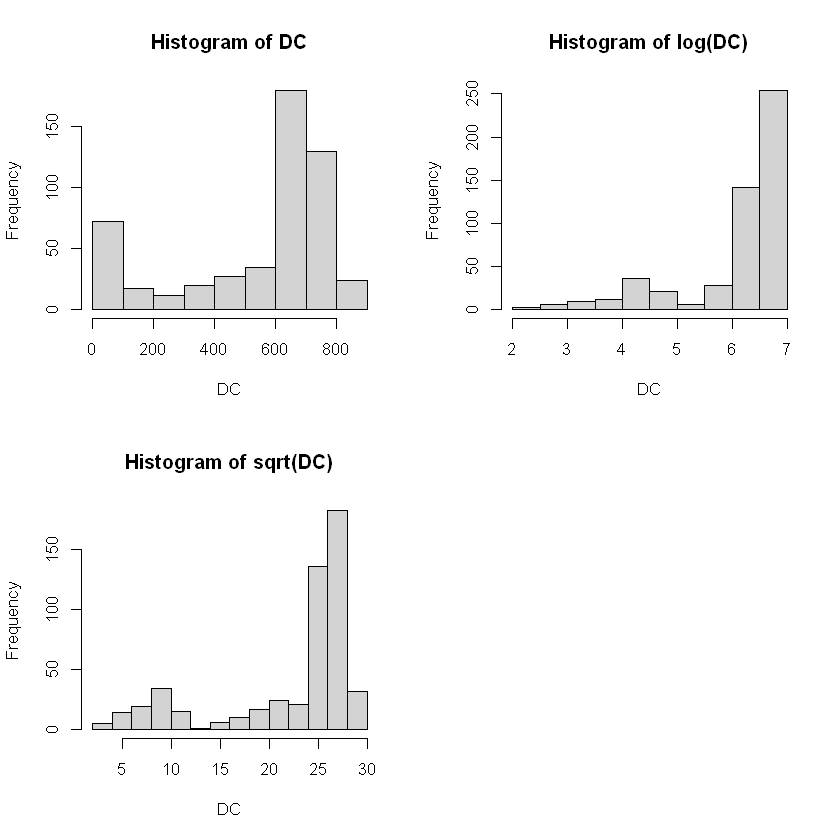

In [38]:
#plot variations of DC
par(mfrow = c(2,2))
hist(fires$DC, xlab = "DC", main="Histogram of DC")
hist(log(fires$DC), xlab = "DC", main="Histogram of log(DC)")
hist(sqrt(fires$DC), xlab = "DC", main="Histogram of sqrt(DC)")

In this case sqrt(DC) appears to make more sense than applying a log function to DC.

Similarly, given the large range identified for DMC , we will see if this can be normalised.

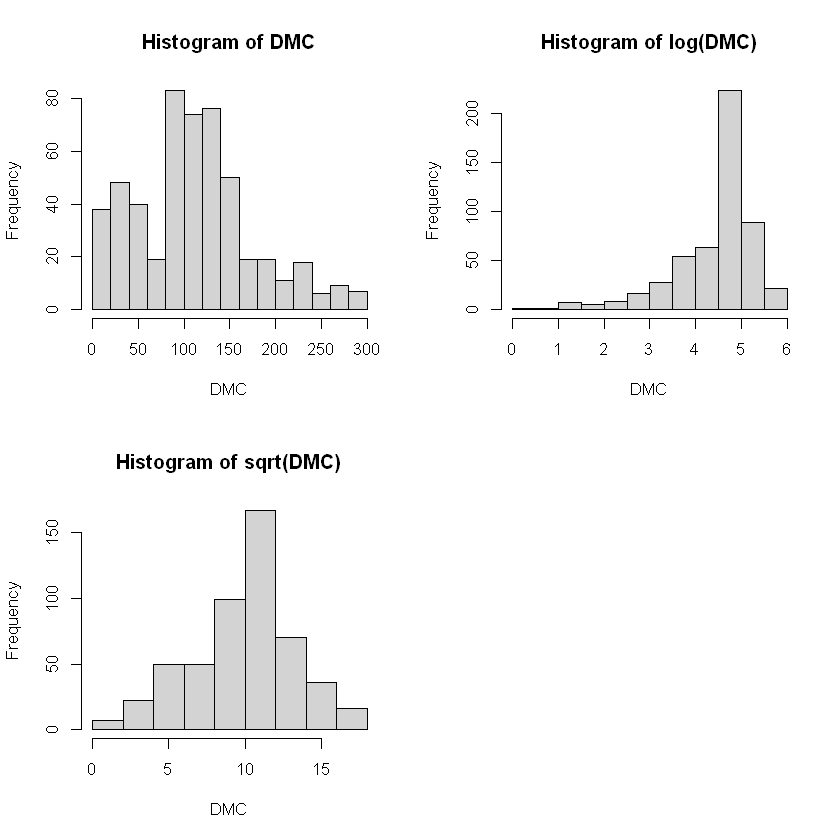

In [39]:
#plot variations of DMC
par(mfrow = c(2,2))
hist(fires$DMC, xlab = "DMC", main="Histogram of DMC")
hist(log(fires$DMC), xlab = "DMC", main="Histogram of log(DMC)")
hist(sqrt(fires$DMC), xlab = "DMC", main="Histogram of sqrt(DMC)")

We see an improvement in the square root of the DMC variable.

Next, we can look at month in more detail.

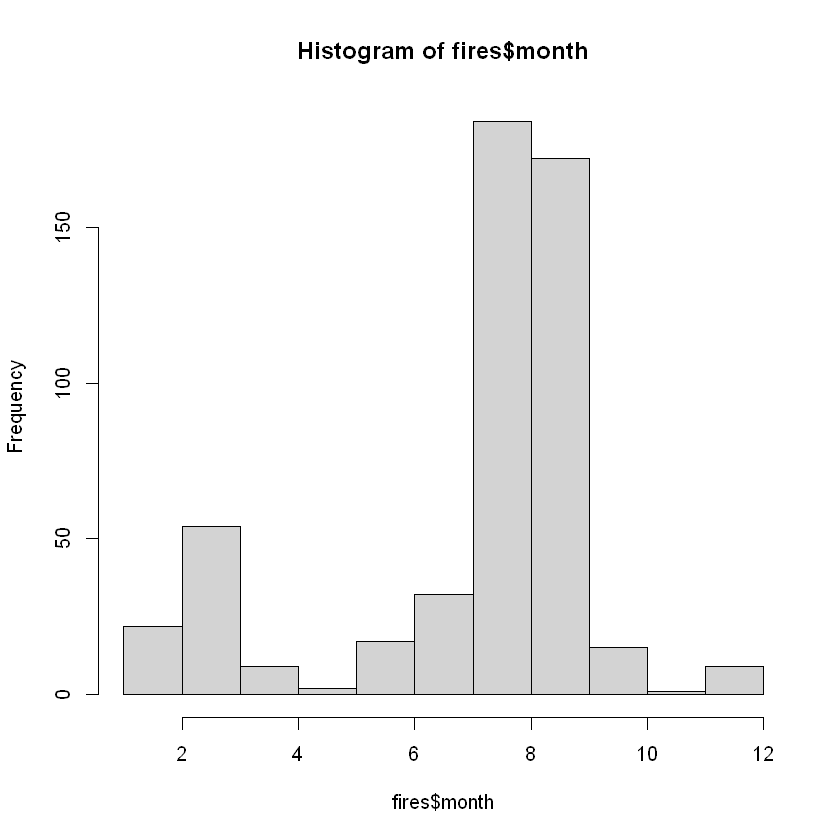

In [40]:
hist(fires$month) #plot month

Months such as January and November are underepresented in the data. This means that when we split the
data into training and testing further down, there is a chance that the November or January data points will
not be represented in the training data set. This tells our model that there is zero chance of a fire occurring in
November.

Portugal, where the data has been gathered, has four distinctive seasons - Summer, Winter, Autumn and
Spring. We can rectify this imbalance by categorising the month by seasons.

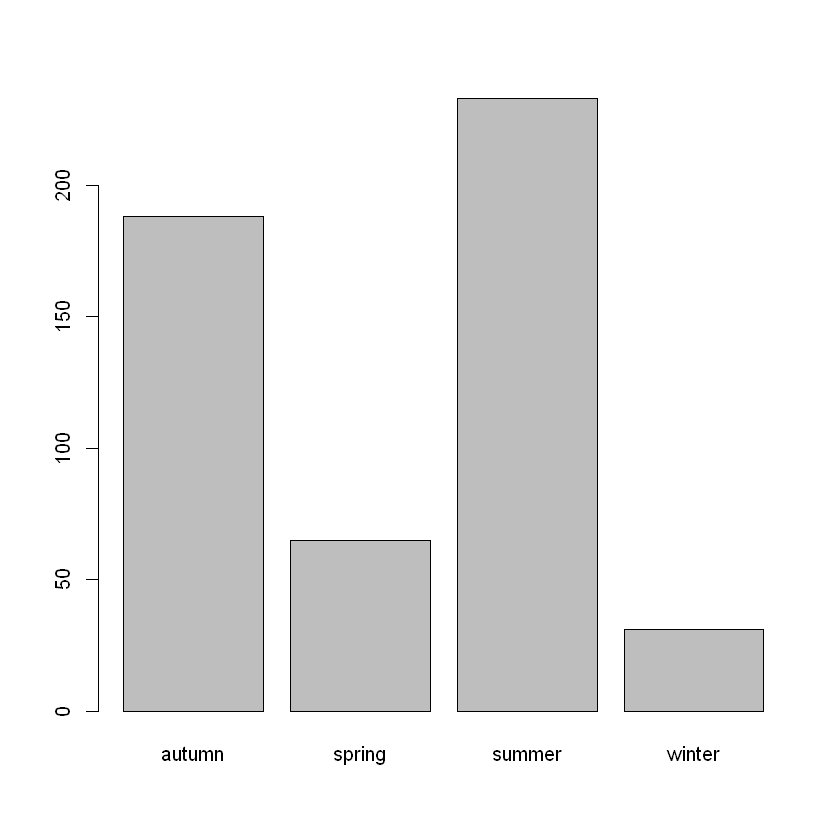

In [41]:
#convert month into seasons and plot graph to see if there has been an improvement
season <-rep("spring", 517)
for (i in 1:517){
if (fires$month[i] %in% c(12,1,2)) season[i] <- "winter"
if (fires$month[i] %in% c(9,10,11)) season[i] <- "autumn"
if (fires$month[i] %in% c(6,7,8)) season[i] <- "summer"

}
season <- as.factor(season)
#adapted from http://www.columbia.edu/~yh2693/ForestFire.html
plot(season)

The distribution for seasons looks more balanced when compared to month. We recognise that this is not a
perfect way to deal with this. For example: the frequency of a fire occurring in June is rather low. However,
when grouped under 'Summer' with August, the probability now seems a lot higher. However, this
workaround for our limited data helps us to reduce the imbalance of data.

We can also analyse the variable day in more detail.

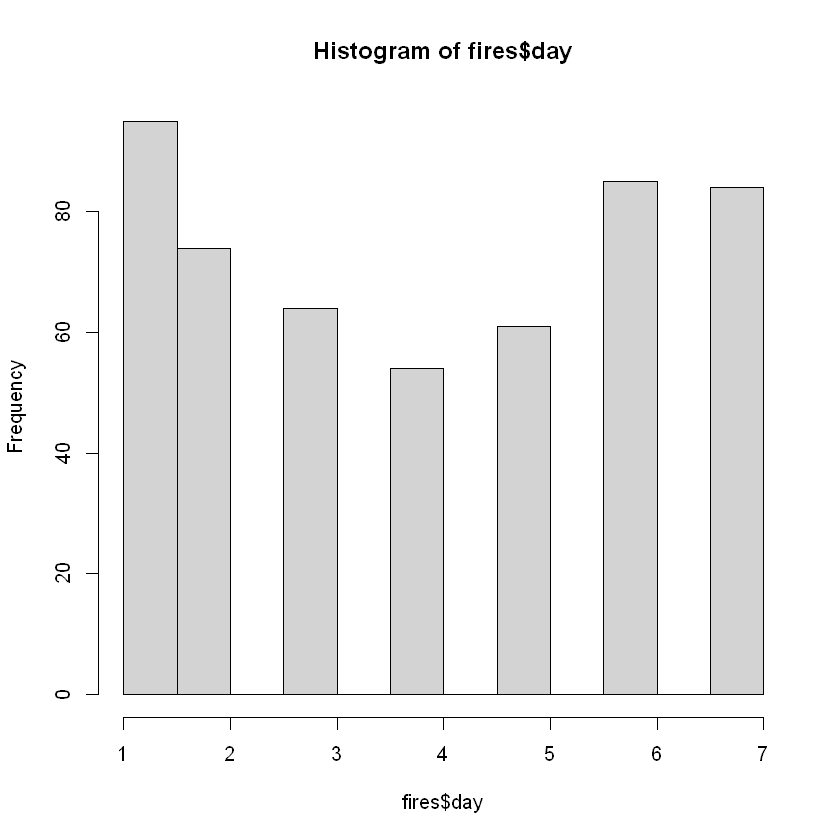

In [42]:
#plot day
hist(fires$day)

As noted above, there is no real pattern for day . From the article included with our assignment
(http://www3.dsi.uminho.pt/pcortez/fires.pdf (http://www3.dsi.uminho.pt/pcortez/fires.pdf)), the author noted
that work days vs. weekends could have an effect on the forest fires. This is evident from our histogram
above, where we can see that fires occurs more frequently on Friday, Saturday and Sunday (represented as
1, 6 and 7 above)

##### Correlation between variables
##### Scatterplots
We can investigate whether there is any linearity/correlation between any of our variables.

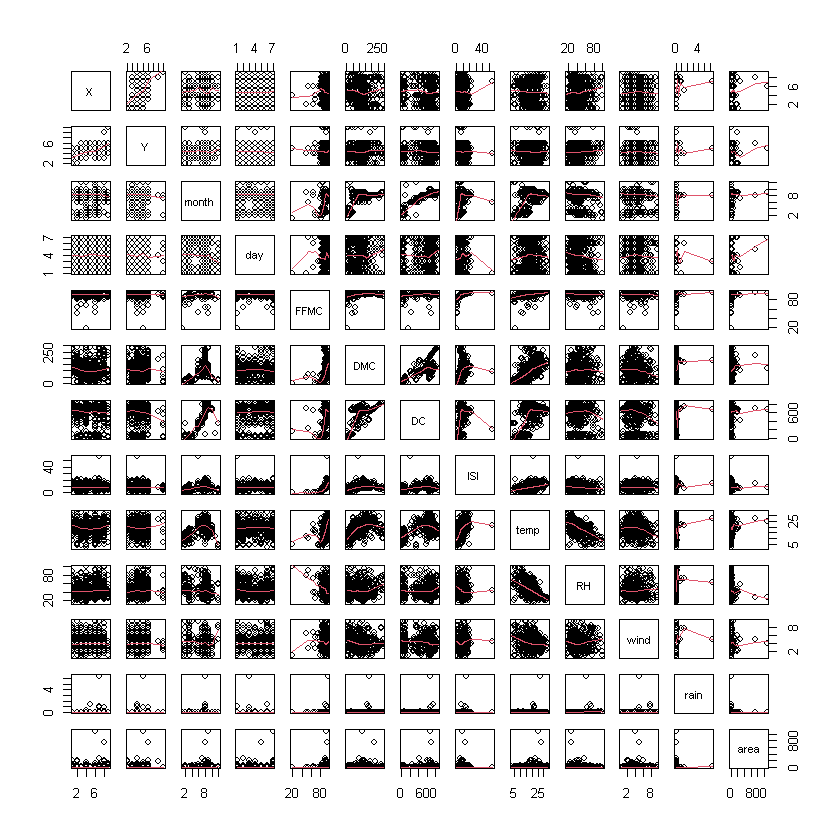

In [43]:
#windows() #uncomment to see the graph larger
pairs(fires, panel = panel.smooth)

For this graph, we make the following observations:

- there are positive correlations between DMC and DC , and month and DC
- there is also an apparent negative correlation between temp and RH

In addition, we will plot each variable against our target variable to see if there is a linear relation.

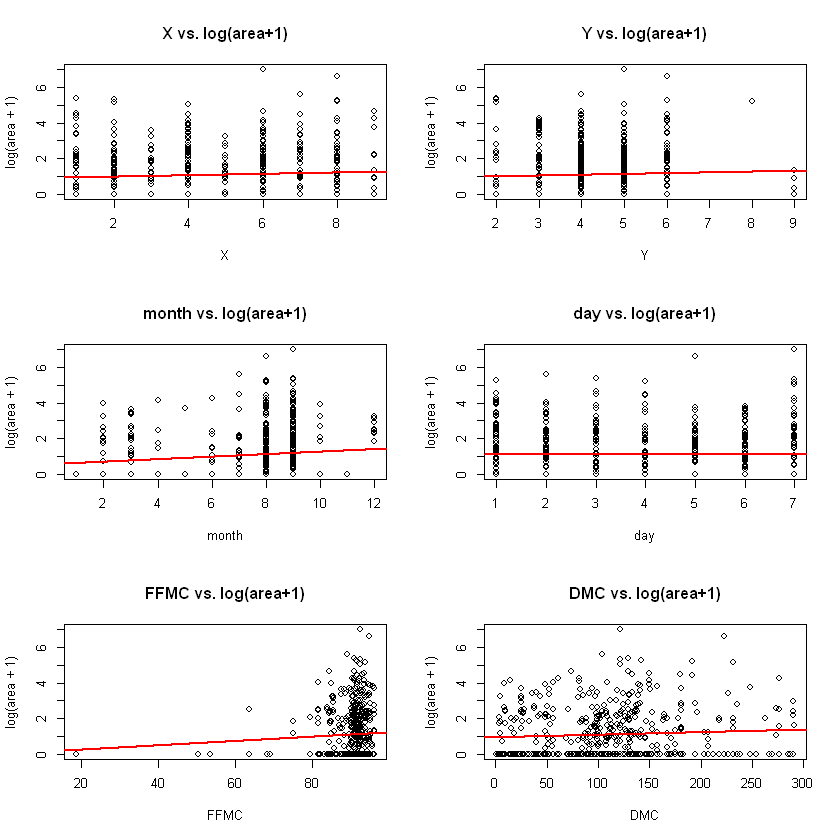

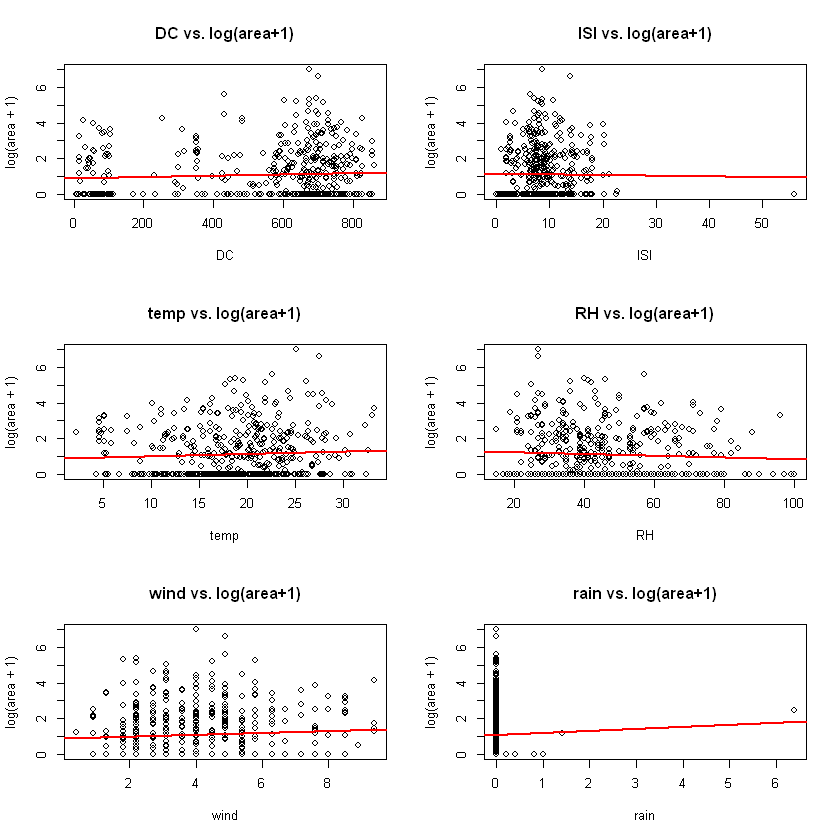

In [44]:
#plot each variable vs. `area` with linear regression line
par(mfrow = c(3,2)) #organise graphs - rows and columns
plot(log(area +1) ~ X, data = fires, main = "X vs. log(area+1)")
abline(lm(log(area+1)~X, data=fires),col='red', lwd=2) #graph linear regression line
plot(log(area +1) ~ Y, data = fires, main = "Y vs. log(area+1)")
abline(lm(log(area+1)~Y, data=fires),col='red', lwd=2)
plot(log(area +1) ~ month, data = fires, main = "month vs. log(area+1)")
abline(lm(log(area+1)~month, data=fires),col='red', lwd=2)
plot(log(area +1) ~ day, data = fires, main = "day vs. log(area+1)")
abline(lm(log(area+1)~day, data=fires),col='red', lwd=2)
plot(log(area +1) ~ FFMC, data = fires, main = "FFMC vs. log(area+1)")
abline(lm(log(area+1)~FFMC, data=fires),col='red', lwd=2)
plot(log(area +1) ~ DMC, data = fires, main = "DMC vs. log(area+1)")
abline(lm(log(area+1)~DMC, data=fires),col='red', lwd=2)
plot(log(area +1) ~ DC, data = fires, main = "DC vs. log(area+1)")
abline(lm(log(area+1)~DC, data=fires),col='red', lwd=2)
plot(log(area +1) ~ ISI, data = fires, main = "ISI vs. log(area+1)")
abline(lm(log(area+1)~ISI, data=fires),col='red', lwd=2)
plot(log(area +1) ~ temp, data = fires, main = "temp vs. log(area+1)")
abline(lm(log(area+1)~temp, data=fires),col='red', lwd=2)
plot(log(area +1) ~ RH, data = fires, main = "RH vs. log(area+1)")
abline(lm(log(area+1)~RH, data=fires),col='red', lwd=2)
plot(log(area +1) ~ wind, data = fires, main = "wind vs. log(area+1)")
abline(lm(log(area+1)~wind, data=fires),col='red', lwd=2)
plot(log(area +1) ~ rain, data = fires, main = "rain vs. log(area+1)")
abline(lm(log(area+1)~rain, data=fires),col='red', lwd=2)

Following the red line, there appears to be a positive correlation for the variables FFMC and rain against
log(area+1) . There is a slight negative correlation between RH and log(area+1) . The other variables
have an almost horizontal line, which indicates no real relation.

We can look at whether the transformed variables above have a more linear relation with our target variable.
We will compare this with the original variable (on the left side) and the transformed variable on the right.

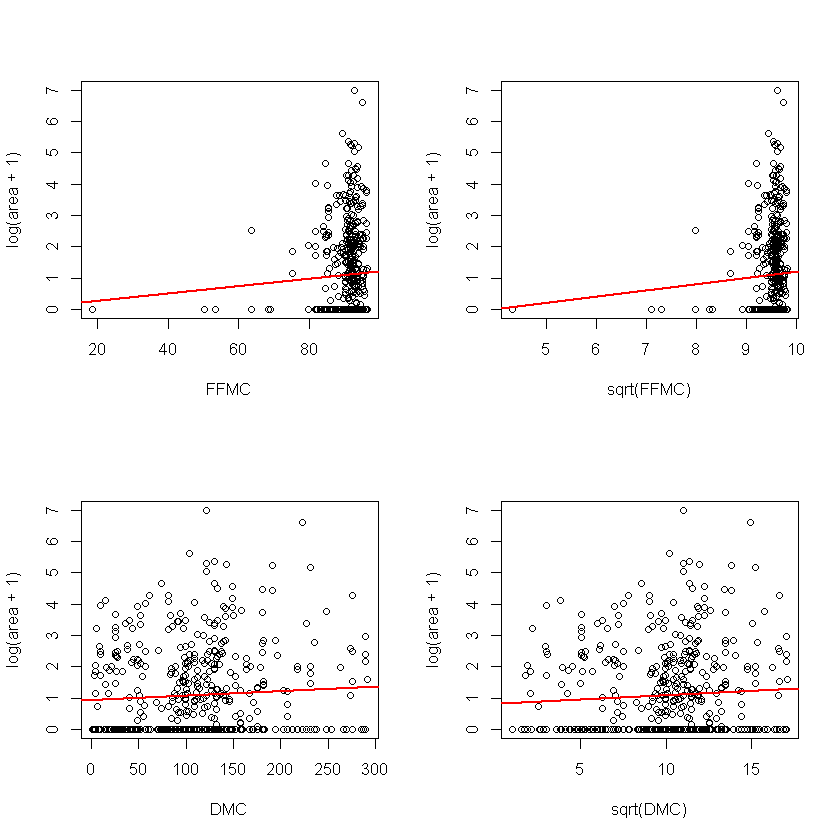

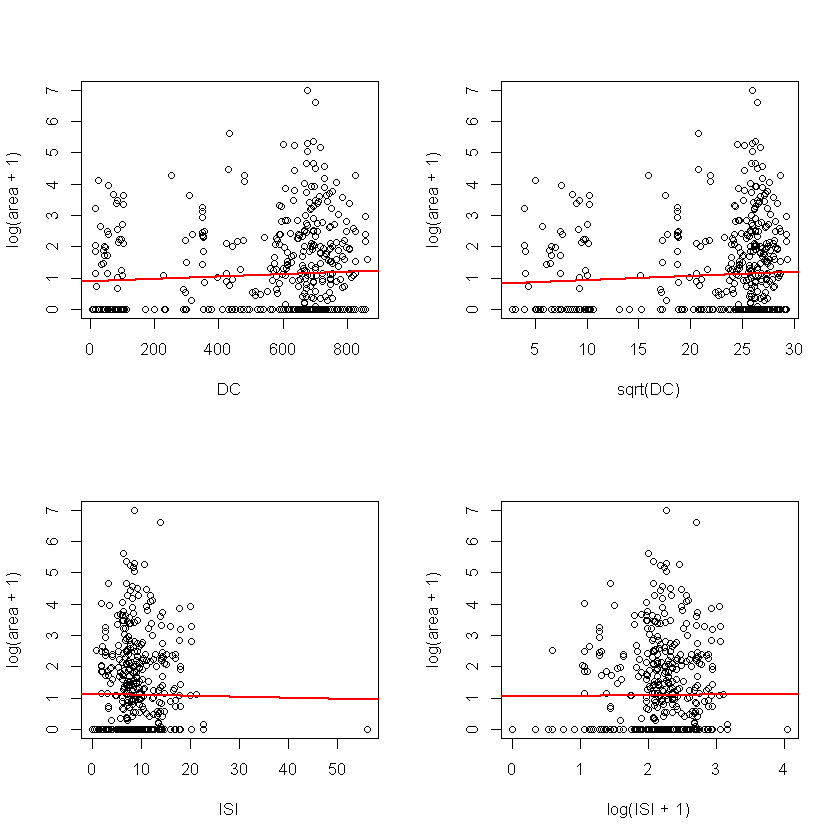

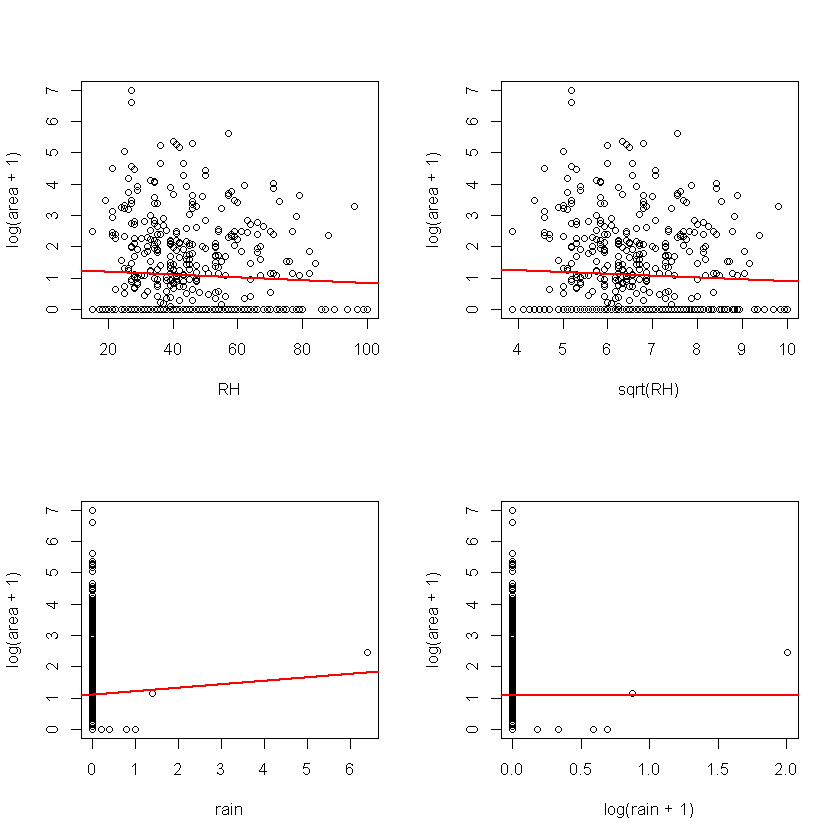

In [46]:
#plot each variable against their transformed variable to see if there is an improvement in relation with `area`
par(mfrow = c(2,2))#organise graphs - rows and columns
plot(log(area +1) ~ FFMC, data = fires)
abline(lm(log(area+1)~FFMC, data=fires),col='red', lwd=2) #plot linear regression line
plot(log(area +1) ~ sqrt(FFMC), data = fires)
abline(lm(log(area+1)~sqrt(FFMC), data=fires),col='red', lwd=2)
plot(log(area +1) ~ DMC, data = fires)
abline(lm(log(area+1)~DMC, data=fires),col='red', lwd=2)
plot(log(area +1) ~ sqrt(DMC), data = fires)
abline(lm(log(area+1)~sqrt(DMC), data=fires),col='red', lwd=2)
plot(log(area +1) ~ DC, data = fires)
abline(lm(log(area+1)~DC, data=fires),col='red', lwd=2)
plot(log(area +1) ~ sqrt(DC), data = fires)
abline(lm(log(area+1)~sqrt(DC), data=fires),col='red', lwd=2)
plot(log(area +1) ~ ISI, data = fires)
abline(lm(log(area+1)~ISI, data=fires),col='red', lwd=2)
plot(log(area +1) ~ log(ISI+1), data = fires)
abline(lm(log(area+1)~log(ISI+1), data=fires),col='red', lwd=2)
plot(log(area +1) ~ RH, data = fires)
abline(lm(log(area+1)~RH, data=fires),col='red', lwd=2)
plot(log(area +1) ~ sqrt(RH), data = fires)
abline(lm(log(area+1)~sqrt(RH), data=fires),col='red', lwd=2)
plot(log(area +1) ~ rain, data = fires)
abline(lm(log(area+1)~rain, data=fires),col='red', lwd=2)
plot(log(area +1) ~ log(rain+1), data = fires)
abline(lm(log(area+1)~log(rain+1), data=fires),col='red', lwd=2)

There appears to be an improvement for most of our variables, especially sqrt(DC) and sqrt(DMC) .
However, there is no improvement for log(rain+1) or log(ISI+1) as the line appears to be more
horizontal for these two variables.

##### Correlation Matrix
We can also use a correlation matrix to confirm if there is a positive or negative relation between each two
variables.

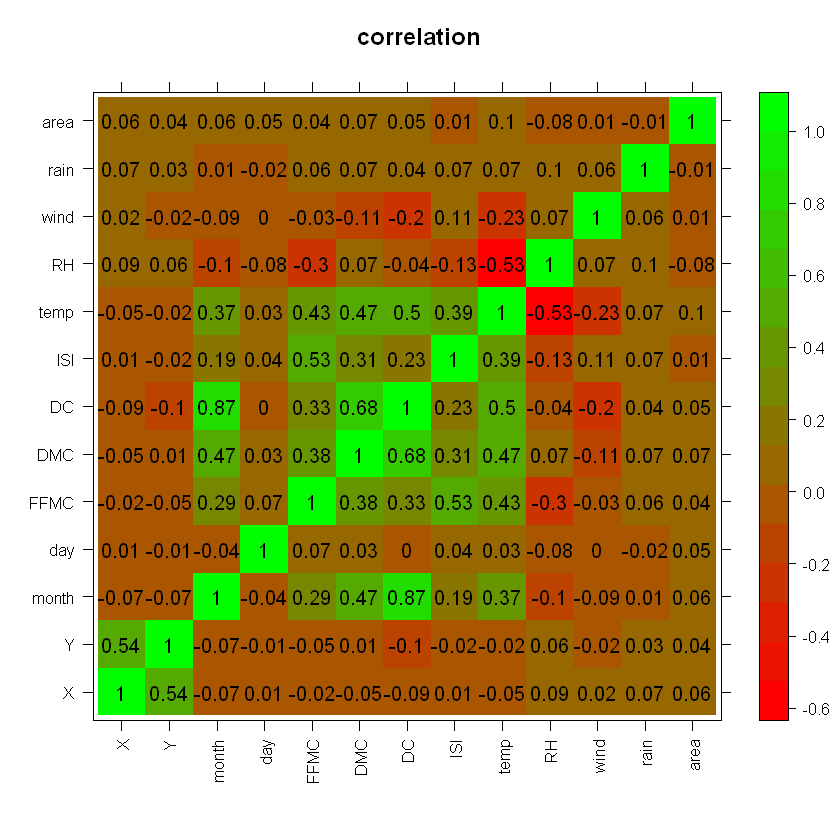

In [47]:
#plot correlation matrix
myPanel <- function(x, y, z, ...) {
 panel.levelplot(x,y,z,...)
 panel.text(x, y, round(z, 2))
}
cols = colorRampPalette(c("red","green")) #define colour scheme
levelplot(cor(fires), col.regions = cols(100), main = "correlation", xlab = NULL, ylab= NULL,
scales = list(x = list(rot = 90)), panel = myPanel)

The above graph contains the correlation coefficients ranging from -1 to +1. We know that a positive value
(green) will indicate that two variables are positively correlated. The closer the value is to 1, the stronger the
positive correlation. A value close to zero indicates that there is no correlation between the variables, while a
value close to -1 indicates a negative correlation.

- X does not appear to have a correlation with any other variable aside from Y
- Similarly, Y does not have any other significant relationship with any variable aside from X
- month and DC have the strongest, positive relationship out of all other variables
- day has no relation with any other variable
- temp and RH have the strongest negative relationship out of all other variables

Given month and DC exhibited the strongest positive relationship, we can graph these together on a 3D
scatterplot to see if their interaction has an effect on area .

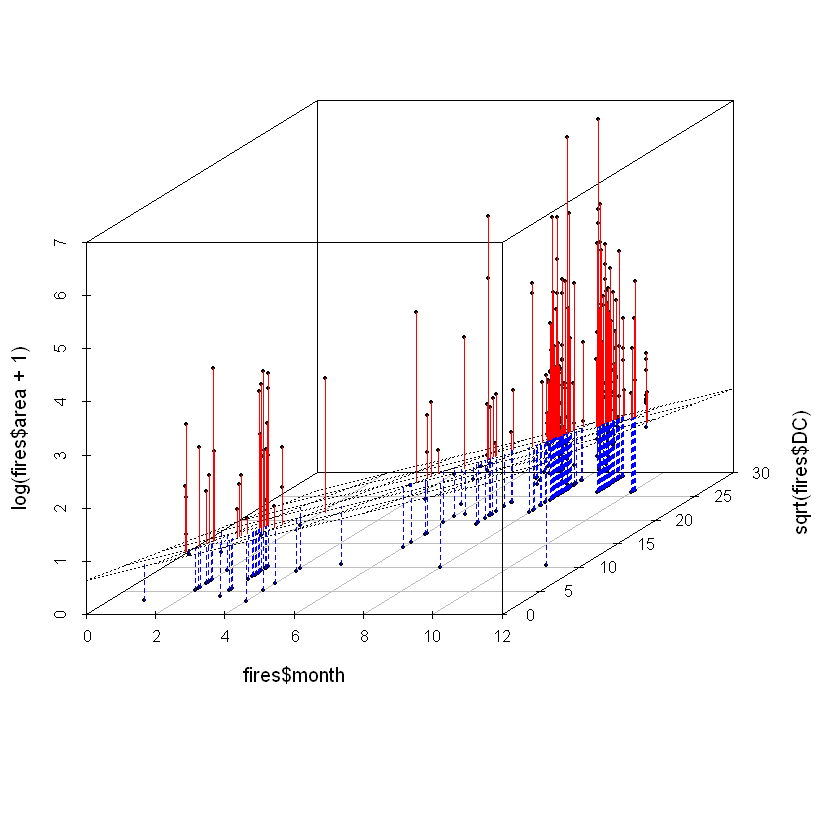

In [49]:
#plot 3D plot to see interactive terms
layout(cbind(1:2, 1:2), heights = c(7, 1))
s3d <- scatterplot3d(x=fires$month, y=sqrt(fires$DC), z=log(fires$area+1), pch = 20, mar = c(5, 3, 4, 3))
my.lm <- lm(log(area+1) ~fires$month+sqrt(fires$DC), data = fires)
s3d$plane3d(my.lm, lty = "dotted")
orig <- s3d$xyz.convert(fires$month, sqrt(fires$DC), log(fires$area+1))
plane <- s3d$xyz.convert(fires$month, sqrt(fires$DC), fitted(my.lm))
i.negpos <- 1 + (resid(my.lm) > 0)
segments(orig$x, orig$y, plane$x, plane$y,col = c("blue", "red")[i.negpos], lty = (2:1)[i.negpos])

Despite a strong positive correlation, there are big residuals when these two variables are used to predict
log(area+1).

##### Creating dummy variables
Before we start developing our model, we will convert our month variable into season , and day into
weekend . Our reason for converting months into seasons is to rectify the imbalance of data we discovered
when plotting histograms. This ensures that all months will be represented in the data. On the other hand,
day does not exhibit any strong relation with any other variables and has no real pattern. Reading through
the journal article(http://www3.dsi.uminho.pt/pcortez/fires.pdf
(http://www3.dsi.uminho.pt/pcortez/fires.pdf)), there is mention that there is an influence on fires depending
on weekends vs. weekdays. This is what we discovered when we also plotted the data. There were more
fires occurring towards the weekend. For this reason, we will also convert this variable.

In [50]:
fires$season <- as.factor(season) #convert to factor
#use dummy library for one-hot encoding
season <- dummy(fires$season)
fires <- cbind(fires, season)
#https://learning.oreilly.com/library/view/r-data-analysis/9781783989065/ch04s03.html

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"


In [51]:
#converting the day into weekend or weekday
fires$day_type <-rep("weekend", 517)
for (i in 1:517){
if (fires$day[i] %in% c(2,3,4,5,6)) fires$day_type[i] <- "weekday"
}
fires$day_type <- as.factor(fires$day_type)


In [52]:
#convert into dummy variables
day_type <- dummy(fires$day_type)
fires <- cbind(fires, day_type)


Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"


After creating the dummy variables, we can remove month and day and day_type from our dataframe

In [53]:
#delete below columns
fires$day <-NULL
fires$month <-NULL
fires$day_type <- NULL
fires$season <- NULL

In addition, to avoid collinearity, we will delete winter and weekday from our dataframe.

In [54]:
#delete below columns
fires$NAwinter <-NULL
fires$NAweekday <-NULL

We will also rename our variables so they appear correctly in our dataframe.

In [55]:
#rename columns
fires<-rename(fires, c("NAautumn"="autumn", "NAsummer"="summer", "NAspring"="spring",
"NAweekend"="weekend"))

Lastly, we will also move our target variable to the first column of our dataframe. This will make it easier when
we start developing our model.


In [56]:
#move 'area' to the first column
col_idx <- grep("area", names(fires))
fires <- fires[, c(col_idx, (1:ncol(fires))[-col_idx])]
head(fires)


,area,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,autumn,spring,summer,weekend
,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0,1,0,0
2,0,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1,0,0,0
3,0,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1,0,0,1
4,0,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0,1,0,0
5,0,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,1,0,1
6,0,8,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0,0,1,1


### 3. Model Development
Before we start developing our models, it is important to randomly split our data in training and testing data
sets. We will do this now to ensure each of our models will use the same train/test dataset.
In addition, we will use MSE as our metric in this task to compare the results for the same test dataset
across all three models.

In [58]:
n <- nrow(fires)
set.seed(33) #set seed for reproducibility
trainIndex <- sample(1:n, size = round(0.8*n), replace=FALSE) #shuffle and split data - 80% training, 20% testing
#randomly assign to train and test sets
set.seed(33)
fires_train <- fires[trainIndex ,]
fires_test <- fires[-trainIndex ,]

##### Multiple linear regression with stepwise selection.
While we were able to learn a lot about our variables after performing EDA, we believe that using linear
regression would be a good starting point to model the data. Linear regression is a simple model with lots of
informative metrics that can further shed light on which variables (original, transformed and interactive terms)
may be significant to predicting area.

We will use stepwise selection (forward, backward and bi-directional) to determine which predictors help to
predict the area burned.

We will start by assessing all variables (untransformed) against the log(area+1) .

In [59]:
#assign training and testing dataset
lm_train <-fires_train
lm_test<-fires_test

In [60]:
#fit linear model on all variables
lm_fit <- lm(log(area+1)~., data = lm_train)
summary(lm_fit)


Call:
lm(formula = log(area + 1) ~ ., data = lm_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8535 -1.0449 -0.5379  0.8306  5.3434 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -1.1174536  1.4593338  -0.766  0.44429   
X            0.0652515  0.0350811   1.860  0.06362 . 
Y           -0.0174255  0.0657971  -0.265  0.79127   
FFMC         0.0145647  0.0150837   0.966  0.33484   
DMC          0.0014899  0.0018610   0.801  0.42384   
DC           0.0005864  0.0008264   0.710  0.47838   
ISI         -0.0134792  0.0183695  -0.734  0.46352   
temp         0.0341762  0.0231098   1.479  0.13997   
RH           0.0006992  0.0062778   0.111  0.91137   
wind         0.1198877  0.0413690   2.898  0.00396 **
rain         0.0156626  0.2146739   0.073  0.94187   
autumn      -0.8142959  0.5481773  -1.485  0.13821   
spring      -0.6651991  0.3586338  -1.855  0.06436 . 
summer      -1.1216046  0.5062499  -2.216  0.02729 * 
weekend      0.1161126  0

The descriptive statistics of our model gives us a summary of the following to assess the accuracy of our
model.

- Residual Standard error - provides an estimate of the standard deviation of our residuals
- The spread of our residuals (difference between the actual target value and the predicted value)
- The standard error of our coefficient estimate
- p-value - which tells us whether our features are significant or not
- Multiple R^2 - which tells us how much variation has been explained by the model. This is a value
between 0 and 1. Generally, R^2 will increase as we add more variables even if these variables are
weakly associated.
- Adjusted R^2 - a more conservative approach over multiple R^2 as it penalises the number of features in
the model
- F-statistic - the greater our F-statistic (further away from 1), the more compelling evidence it provides
against the null hypothesis. It also takes into account the number of predictors

For the purpose of this task, we will focus on p-value for feature selection and analysis of the model. We will
also briefly look at the other metrics to assess whether there has been an improvement in our model.

From our model above, we can see that there is some significance for the variables spring , summer , X
and wind . Our adjusted R-squared tells us roughly 2.6% of the variation of our model has been explained.
Our F-statistic is above 1 with 399 degrees of freedom.

Below, we will try our meaningful transformed variables based on our EDA above to try and create a model
with higher accuracy.

In [62]:
#fit linear model on subset of variables
lm_fit2 <- lm(log(area+1)~sqrt(FFMC)+sqrt(DMC)+sqrt(DC)+ISI+sqrt(RH)+rain +autumn+spring+summer+weekend+X+Y+temp+wind,
data = lm_train)
summary(lm_fit2)


Call:
lm(formula = log(area + 1) ~ sqrt(FFMC) + sqrt(DMC) + sqrt(DC) + 
    ISI + sqrt(RH) + rain + autumn + spring + summer + weekend + 
    X + Y + temp + wind, data = lm_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8499 -1.0437 -0.5026  0.8341  5.3343 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -2.125005   2.379058  -0.893  0.37228   
sqrt(FFMC)   0.188720   0.231425   0.815  0.41529   
sqrt(DMC)    0.042911   0.041779   1.027  0.30501   
sqrt(DC)     0.032134   0.030797   1.043  0.29739   
ISI         -0.012569   0.017866  -0.704  0.48215   
sqrt(RH)     0.019397   0.085269   0.227  0.82017   
rain         0.006344   0.213780   0.030  0.97634   
autumn      -1.130880   0.556123  -2.034  0.04266 * 
spring      -0.664177   0.365109  -1.819  0.06964 . 
summer      -1.446460   0.536889  -2.694  0.00735 **
weekend      0.112474   0.148347   0.758  0.44879   
X            0.068947   0.035126   1.963  0.05036 . 
Y           -0.021522

From this model, we can see that there has been a slight improvement in our adjusted R-squared and overall
p-value. The model has pointed out the significant variables to be autumn , spring , summer and wind .
We can also use interactive terms of the transformed variables to see if we can continue to further improve
the model. We will begin by including all variables and all their interactive terms.

In [64]:
#fit linear model on subset of variables
lm_fit3 <- lm(log(area+1)~(sqrt(FFMC)+sqrt(DMC)+sqrt(DC)+ISI+sqrt(RH)+rain +autumn+spring+summer+weekend+X+Y+temp+wind)**2,
 data = lm_train)
summary(lm_fit3)


Call:
lm(formula = log(area + 1) ~ (sqrt(FFMC) + sqrt(DMC) + sqrt(DC) + 
    ISI + sqrt(RH) + rain + autumn + spring + summer + weekend + 
    X + Y + temp + wind)^2, data = lm_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1561 -0.9320 -0.2238  0.6434  4.8797 

Coefficients: (10 not defined because of singularities)
                       Estimate Std. Error t value Pr(>|t|)  
(Intercept)          -8.435e+00  1.147e+02  -0.074   0.9414  
sqrt(FFMC)            8.422e-01  1.237e+01   0.068   0.9457  
sqrt(DMC)             9.209e-01  4.147e+00   0.222   0.8244  
sqrt(DC)              4.434e-02  1.647e+00   0.027   0.9785  
ISI                  -4.298e-01  1.888e+00  -0.228   0.8201  
sqrt(RH)              3.090e+00  1.018e+01   0.304   0.7617  
rain                  7.341e+02  6.126e+02   1.198   0.2316  
autumn               -1.093e+01  3.109e+01  -0.352   0.7254  
spring                1.280e+01  3.500e+01   0.366   0.7148  
summer               -2.274e+01  3.494e+01  

Our p-value is now much worse than before. We have improved our multiple R^2 but this would be
accounted for the huge increase in our variables. Our residual standard error has also increased and our
adjusted R-squared is much worse, which tells us that we have a lot of unnecessary variables in our model.
Our F-statistic has also fallen below 1, which tells us that a model with only the intercept would perform
better.

Looking at the significant variables for our interaction transformed terms, we see little significance for
sqrt(RH):summer , sqrt(DC):Y , ISI:Y and spring:temp

##### Step-wise selection
We know that in reality only a subset of our predictors above will help us to explain our target variable. In
order to perform our variable selection, we will use three approaches - forward selection, backward selection
and bi-directional selection. In addition, we will look at the AIC score to evaluate our model. In this case, a
lower AIC score means a better model.
We will start with forward selection to see what variables the model considers to be most significant.


In [66]:
#perform forward selection
min.model <- lm(log(area+1) ~ 1, data=lm_train) #define bare, minimum model
biggest <- formula(log(area+1)~(sqrt(FFMC)+sqrt(DMC)+sqrt(DC)+ISI+sqrt(RH)+rain +autumn +spring+
                                summer+weekend+X+Y+temp+wind)**2, data = lm_train) #model with all possible variables
fwd.model <- step(min.model, direction= "forward", scope = biggest) #use step - forward direction
summary(fwd.model)

Start:  AIC=281.73
log(area + 1) ~ 1

             Df Sum of Sq    RSS    AIC
+ wind        1   10.2390 803.43 278.49
+ sqrt(DC)    1    6.7981 806.87 280.26
+ X           1    5.6821 807.98 280.83
+ sqrt(DMC)   1    4.7552 808.91 281.31
+ spring      1    3.9695 809.70 281.71
<none>                    813.67 281.73
+ autumn      1    3.8766 809.79 281.76
+ temp        1    2.8974 810.77 282.26
+ sqrt(FFMC)  1    2.8181 810.85 282.30
+ sqrt(RH)    1    2.1405 811.53 282.64
+ summer      1    1.1978 812.47 283.12
+ weekend     1    0.6718 812.99 283.39
+ rain        1    0.6647 813.00 283.39
+ Y           1    0.4917 813.17 283.48
+ ISI         1    0.0522 813.61 283.71

Step:  AIC=278.49
log(area + 1) ~ wind

             Df Sum of Sq    RSS    AIC
+ sqrt(DC)    1   11.0994 792.33 274.73
+ sqrt(DMC)   1    7.5184 795.91 276.60
+ spring      1    7.0790 796.35 276.83
+ autumn      1    7.0612 796.37 276.84
+ temp        1    6.3782 797.05 277.19
+ X           1    5.4163 798.01 277.69
<


Call:
lm(formula = log(area + 1) ~ wind + sqrt(DC) + X + summer + autumn + 
    temp + sqrt(DC):X + sqrt(DC):summer, data = lm_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8676 -1.0276 -0.4703  0.7765  5.5554 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -2.331787   0.738185  -3.159 0.001703 ** 
wind             0.102546   0.039824   2.575 0.010379 *  
sqrt(DC)         0.155862   0.042042   3.707 0.000239 ***
X                0.297467   0.115476   2.576 0.010349 *  
summer           0.194971   0.877580   0.222 0.824295    
autumn          -1.743342   0.660064  -2.641 0.008582 ** 
temp             0.034482   0.015470   2.229 0.026370 *  
sqrt(DC):X      -0.010222   0.004827  -2.118 0.034825 *  
sqrt(DC):summer -0.082449   0.047859  -1.723 0.085698 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.366 on 405 degrees of freedom
Multiple R-squared:  0.07064,	Adjusted R-squared:  

Our final AIC score after performing forward step selection is 267.4. The model has only included wind ,
sqrt(DC) , X , summer , autumn , temp , sqrt(DC):X and sqrt(DC):summer in the final model. We
can see an improvement in our p-value, residual standard error and F-statistic. Our adjusted R-squared has
definitely improved from our previous model but it is still low.

We can look at backward step selection next to see if we can identify more significant variables.

In [67]:
bwd.model <- step(lm_fit3, direction= "backward") #use step- backward direction
summary(bwd.model)

Start:  AIC=376.17
log(area + 1) ~ (sqrt(FFMC) + sqrt(DMC) + sqrt(DC) + ISI + sqrt(RH) + 
    rain + autumn + spring + summer + weekend + X + Y + temp + 
    wind)^2


Step:  AIC=376.17
log(area + 1) ~ sqrt(FFMC) + sqrt(DMC) + sqrt(DC) + ISI + sqrt(RH) + 
    rain + autumn + spring + summer + weekend + X + Y + temp + 
    wind + sqrt(FFMC):sqrt(DMC) + sqrt(FFMC):sqrt(DC) + sqrt(FFMC):ISI + 
    sqrt(FFMC):sqrt(RH) + sqrt(FFMC):rain + sqrt(FFMC):autumn + 
    sqrt(FFMC):spring + sqrt(FFMC):summer + sqrt(FFMC):weekend + 
    sqrt(FFMC):X + sqrt(FFMC):Y + sqrt(FFMC):temp + sqrt(FFMC):wind + 
    sqrt(DMC):sqrt(DC) + sqrt(DMC):ISI + sqrt(DMC):sqrt(RH) + 
    sqrt(DMC):rain + sqrt(DMC):autumn + sqrt(DMC):spring + sqrt(DMC):summer + 
    sqrt(DMC):weekend + sqrt(DMC):X + sqrt(DMC):Y + sqrt(DMC):temp + 
    sqrt(DMC):wind + sqrt(DC):ISI + sqrt(DC):sqrt(RH) + sqrt(DC):rain + 
    sqrt(DC):autumn + sqrt(DC):spring + sqrt(DC):summer + sqrt(DC):weekend + 
    sqrt(DC):X + sqrt(DC):Y + sqrt(DC):te


Call:
lm(formula = log(area + 1) ~ sqrt(DMC) + sqrt(DC) + ISI + sqrt(RH) + 
    rain + autumn + spring + summer + X + Y + temp + wind + sqrt(DMC):sqrt(DC) + 
    sqrt(DMC):spring + sqrt(DMC):summer + sqrt(DC):summer + sqrt(DC):X + 
    sqrt(DC):Y + ISI:Y + sqrt(RH):rain + sqrt(RH):summer + autumn:temp + 
    spring:temp + summer:temp, data = lm_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3604 -0.9294 -0.3779  0.6788  5.3688 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.688492   1.628971  -0.423 0.672781    
sqrt(DMC)           0.726878   0.277832   2.616 0.009236 ** 
sqrt(DC)            0.013727   0.060562   0.227 0.820812    
ISI                 0.076341   0.064980   1.175 0.240781    
sqrt(RH)           -0.015265   0.102790  -0.149 0.882019    
rain               21.441695  11.161584   1.921 0.055459 .  
autumn             -2.453608   0.955996  -2.567 0.010645 *  
spring             -0.807958   1.330834  -0.607 

There is a huge improvement in our p-value and adjusted R^2 after performing backward selection. Despite a
drop in our F-statistic, it still remains over one. However, our AIC score remains about the same as the model
with forward selection. From backward selection, we have a lot more variables when compared to forward
selection. The more significant variables include sqrt(DMC) , summer , X , sqrt(DC):X and
sqrt(DC):Y.

Lastly, we can see if the model can be improved by using bi-directional steps.

In [68]:
bidir.model <- step(lm_fit3, direction= "both") #use step - both directions
summary(bidir.model)

Start:  AIC=376.17
log(area + 1) ~ (sqrt(FFMC) + sqrt(DMC) + sqrt(DC) + ISI + sqrt(RH) + 
    rain + autumn + spring + summer + weekend + X + Y + temp + 
    wind)^2


Step:  AIC=376.17
log(area + 1) ~ sqrt(FFMC) + sqrt(DMC) + sqrt(DC) + ISI + sqrt(RH) + 
    rain + autumn + spring + summer + weekend + X + Y + temp + 
    wind + sqrt(FFMC):sqrt(DMC) + sqrt(FFMC):sqrt(DC) + sqrt(FFMC):ISI + 
    sqrt(FFMC):sqrt(RH) + sqrt(FFMC):rain + sqrt(FFMC):autumn + 
    sqrt(FFMC):spring + sqrt(FFMC):summer + sqrt(FFMC):weekend + 
    sqrt(FFMC):X + sqrt(FFMC):Y + sqrt(FFMC):temp + sqrt(FFMC):wind + 
    sqrt(DMC):sqrt(DC) + sqrt(DMC):ISI + sqrt(DMC):sqrt(RH) + 
    sqrt(DMC):rain + sqrt(DMC):autumn + sqrt(DMC):spring + sqrt(DMC):summer + 
    sqrt(DMC):weekend + sqrt(DMC):X + sqrt(DMC):Y + sqrt(DMC):temp + 
    sqrt(DMC):wind + sqrt(DC):ISI + sqrt(DC):sqrt(RH) + sqrt(DC):rain + 
    sqrt(DC):autumn + sqrt(DC):spring + sqrt(DC):summer + sqrt(DC):weekend + 
    sqrt(DC):X + sqrt(DC):Y + sqrt(DC):te


Call:
lm(formula = log(area + 1) ~ sqrt(DMC) + sqrt(DC) + ISI + sqrt(RH) + 
    rain + autumn + spring + summer + X + Y + temp + wind + sqrt(DMC):sqrt(DC) + 
    sqrt(DMC):spring + sqrt(DMC):summer + sqrt(DC):summer + sqrt(DC):X + 
    sqrt(DC):Y + ISI:Y + sqrt(RH):rain + autumn:temp + spring:temp + 
    summer:temp + sqrt(RH):Y, data = lm_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5075 -0.9956 -0.3393  0.7193  5.1491 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -3.708049   2.123291  -1.746 0.081536 .  
sqrt(DMC)           0.717770   0.277251   2.589 0.009990 ** 
sqrt(DC)            0.026633   0.060772   0.438 0.661450    
ISI                 0.081705   0.065090   1.255 0.210133    
sqrt(RH)            0.416265   0.220652   1.887 0.059969 .  
rain               18.283142  11.112746   1.645 0.100728    
autumn             -2.864200   0.939148  -3.050 0.002447 ** 
spring             -1.026079   1.329982  -0.771 0.440

Bi-directional steps improve our model slightly in terms of adjusted R-squared, residual standard error and Fstatistic. There is also an improvement in our p-value. The more significant variables from this (as indicated
with two or more stars) include sqrt(DMC) , autumn , X , sqrt(DC):X and sqrt(DC):Y.

From the three models created above, we see a few commonalities. For example: wind , X , sqrt(DC) ,
summer , temp , sqrt(DC):X autumn , sqrt(DC):summer appear in all three models.

We can use the anova() function to further compare all three models.

In [69]:
anova(fwd.model, bwd.model, bidir.model ) #compare all models

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,405,756.1872,NA,NA,NA,NA
2,389,702.1815,16,54.005729,1.869907,0.02175858
3,389,700.7553,0,1.426192,NA,NA


While there are some missing statistics from the table above, we can see that RSS yields the best results
from our three models.

Using the significant variables discovered above, we will create one final model. In addition to including the
common variables, we will also add any significant variables to our model. We will also apply the hiearchy
principle in this case. The hierarchy principle states that any individual term that is part of the interactive term
should be included (even if their coefficient is not considered significant). After making sure the hierarchy
principle applies, we have our final model below.

In [70]:
#fit linear model on subset of variables
final.model <- lm(log(area+1)~ wind +X+Y+sqrt(DC)+summer+temp+sqrt(DC):X+autumn+sqrt(DC):summer
 +sqrt(DMC)+sqrt(DC):Y, data = lm_train)
summary(final.model)


Call:
lm(formula = log(area + 1) ~ wind + X + Y + sqrt(DC) + summer + 
    temp + sqrt(DC):X + autumn + sqrt(DC):summer + sqrt(DMC) + 
    sqrt(DC):Y, data = lm_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0316 -1.0336 -0.3927  0.8105  5.5076 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.695023   0.924761  -0.752 0.452749    
wind             0.095674   0.039752   2.407 0.016544 *  
X                0.504075   0.133394   3.779 0.000181 ***
Y               -0.610893   0.203021  -3.009 0.002786 ** 
sqrt(DC)         0.078355   0.048984   1.600 0.110473    
summer           0.405855   0.877243   0.463 0.643867    
temp             0.032414   0.015463   2.096 0.036686 *  
autumn          -1.902518   0.661415  -2.876 0.004236 ** 
sqrt(DMC)        0.034444   0.036605   0.941 0.347298    
X:sqrt(DC)      -0.019000   0.005583  -3.403 0.000733 ***
sqrt(DC):summer -0.100127   0.048192  -2.078 0.038377 *  
Y:sqrt(DC)       0.026692 

##### Subset selection
For good measure, we can go one step further and perform subset selection on our input variables to identify
the optimal number of variables that should be included in our final model.

In [72]:
#perform subset selection
regfit_full = regsubsets(log(area+1)~wind +X+Y+sqrt(DC)+summer+temp+sqrt(DC):X+autumn+
                         sqrt(DC):summer+sqrt(DMC)+sqrt(DC):Y, 
                         data = lm_train, nvmax = 11) #set to 11 given we have 11 variables
summary(regfit_full)

Subset selection object
Call: regsubsets.formula(log(area + 1) ~ wind + X + Y + sqrt(DC) + 
    summer + temp + sqrt(DC):X + autumn + sqrt(DC):summer + sqrt(DMC) + 
    sqrt(DC):Y, data = lm_train, nvmax = 11)
11 Variables  (and intercept)
                Forced in Forced out
wind                FALSE      FALSE
X                   FALSE      FALSE
Y                   FALSE      FALSE
sqrt(DC)            FALSE      FALSE
summer              FALSE      FALSE
temp                FALSE      FALSE
autumn              FALSE      FALSE
sqrt(DMC)           FALSE      FALSE
X:sqrt(DC)          FALSE      FALSE
sqrt(DC):summer     FALSE      FALSE
Y:sqrt(DC)          FALSE      FALSE
1 subsets of each size up to 11
Selection Algorithm: exhaustive
          wind X   Y   sqrt(DC) summer temp autumn sqrt(DMC) X:sqrt(DC)
1  ( 1 )  "*"  " " " " " "      " "    " "  " "    " "       " "       
2  ( 1 )  "*"  " " " " " "      " "    " "  " "    " "       " "       
3  ( 1 )  "*"  "*" " " "*"      " " 

Subset selection uses an exhaustive selection algorithm, which helps us to identify the best combination from
all of our input variables. In this case, wind has been identified as the most important variable.

We can also look at the optimal number of variables to include in our final model to achieve the lowest RSS,
Cp, BIC and the highest adjusted R^2

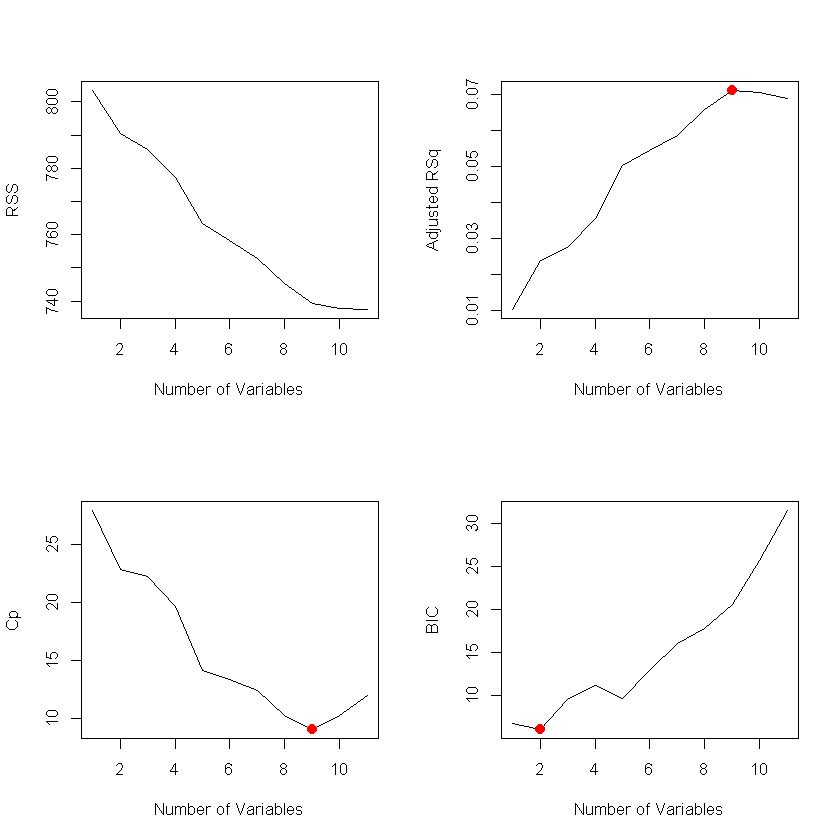

In [73]:
#plot graphs to find optimal number of variables
regfit_full = regsubsets(log(area+1)~wind +X+Y+sqrt(DC)+summer+temp+sqrt(DC):X+autumn+sqrt(DC):summer+sqrt(DMC)+sqrt(DC):Y,
                         data = lm_train, nvmax = 11) #set to 11 given we have 11 variables
reg_summary = summary(regfit_full)
par(mfrow = c(2,2))
#plot rss
plot(reg_summary$rss, xlab = "Number of Variables", ylab = "RSS", type = "l")
plot(reg_summary$adjr2, xlab = "Number of Variables", ylab = "Adjusted RSq", type = "l")
#plot adjusted R^2
adj_r2_max = which.max(reg_summary$adjr2) # 11
points(adj_r2_max, reg_summary$adjr2[adj_r2_max], col ="red", cex = 2, pch = 20)
#plot Cp
plot(reg_summary$cp, xlab = "Number of Variables", ylab = "Cp", type = "l")
cp_min = which.min(reg_summary$cp) # 10
points(cp_min, reg_summary$cp[cp_min], col = "red", cex = 2, pch = 20)
#plot BIC
plot(reg_summary$bic, xlab = "Number of Variables", ylab = "BIC", type = "l")
bic_min = which.min(reg_summary$bic) # 6
points(bic_min, reg_summary$bic[bic_min], col = "red", cex = 2, pch = 20)

Cp is a good metric to minimise overfitting. The Cp and adjusted R^2 plots above tell us that 9 is the optimal
number of variables for our model. BIC is related to our test error, and its plot tells us that the optimal number
of variables should be 2.

Given two of our plots above have identified 9 as the optimal model, we can use our results from best subset
selection (above) to see which two variables we should take out in order to increase our adjusted R^2 and
decrease the Cp. However, upon further inspection, the two variables appear to be summer and
sqrt(DC) . Given their interactive terms are included in the model, we need to keep these terms (based on
the hiearchy principle). Thus, we will not make any final changes to our model.

https://medium.com/analytics-vidhya/model-selection-cp-aic-bic-and-adjusted-r2-6a0af25945b6
(https://medium.com/analytics-vidhya/model-selection-cp-aic-bic-and-adjusted-r2-6a0af25945b6)

Additionally, we can calculate the confidence interval for our coefficient estimates. Below, we want a 95%
confidence interval that our value will fall in the range.


In [74]:
#find confidence interval - 95%
confint(final.model, level = 0.95)

,2.5 %,97.5 %
(Intercept),-2.512994993,1.122948726
wind,0.017526198,0.173820958
X,0.241838381,0.766311559
Y,-1.010008288,-0.211778337
sqrt(DC),-0.017942056,0.174652475
summer,-1.318702353,2.130412280
temp,0.002015618,0.062811594
autumn,-3.202781673,-0.602253586
sqrt(DMC),-0.037518307,0.106405649
X:sqrt(DC),-0.029975313,-0.008024233


The smaller the range, the better. Given we are dealing with small values, the confidence interval for
autumn seems pretty high.

Given our primary objective was to use p-value to assess our model, we have achieved the lowest p-value in
our final model. Despite having a lower adjusted R-squared than desired, our F-statistic has improved. Our
residual standard error has remained about the same throughout each stage.

We can also plot our final model to learn more about our dataset.

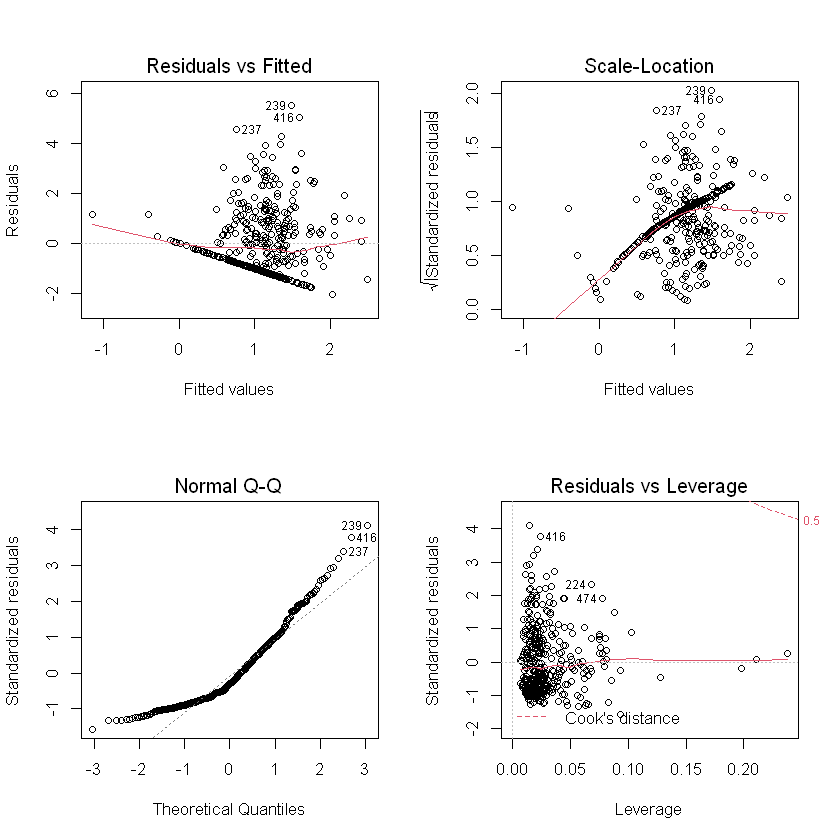

In [75]:
par(mfcol=c(2,2))
plot(final.model)

- Our first plot (residuals vs. fitted) gives us an idea of whether a linear regression model is appropriate for
our data. The residuals should be spread equally around the hotizontal line without any distinct patterns.
We can see a pattern from our plot, which tells us that our response variable may be non-linear. This
suggests that a non-linear model could fit the data better.
- The scale-location plot looks at equal variance. A good indication of this is if the the random residuals
are spread equally in a horizontal line. In our case, the line is far from horizontal. This suggests that our
data may be beyond the capabilities of a multiple linear model.
- The qqplot validates whether our distribution is normal. Our data points should follow the dash line.
Unfortunately, our data points deviate from the dash line at both ends and does not follow the dash line
very well.
- Our final graph (residuals vs. leverage) points out any abnormal data points that can affect the
performance of our linear regression model dramatically.

We can further examine influential points more closely using Cook's distance and studentised residuals
belows

Warning message in plot.window(...):
""id.method" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""id.method" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""id.method" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""id.method" is not a graphical parameter"
Warning message in box(...):
""id.method" is not a graphical parameter"
Warning message in title(...):
""id.method" is not a graphical parameter"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""id.method" is not a graphical parameter"


,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
76,0.24628756,0.23748844,1.578032e-03
517,0.06153071,0.21090962,8.453758e-05
239,4.17879819,0.01425652,2.021813e-02
224,2.34825253,0.06861871,3.347909e-02
416,3.81799463,0.02403250,2.893526e-02


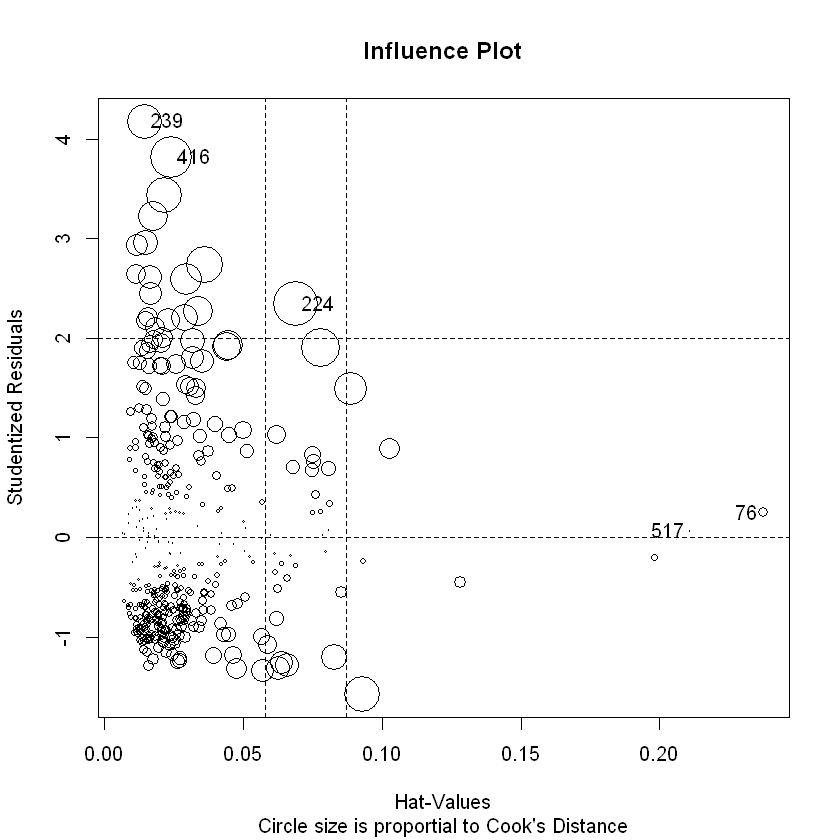

In [76]:
#find influential points
influencePlot(final.model, scale=5, id.method="noteworthy", main="Influence Plot", sub=
"Circle size is proportial to Cook's Distance" )

We can look at where the dashed vertical and horizontal lines are placed on the graph as indicators.
However, given this is not a wrangling task, we will not need to remove any data points.

Finally, we can use our model to see how well it performs on our testing set. For this task, we will calculate
the performance of a model based on the mean squared error and R^2 value.


In [77]:
#use final model to predict test set
pred <- predict(final.model, lm_test)

In [78]:
#calculate mse by subtracting predicted value against actual values, squared
avg.mse= mean(pred-log(lm_test$area+1))^2
avg.mse

[1] 3.031623e-05

##### Final Result:
Our final MSE from multiple linear regression model, after performing stepwise selection to find the best
variables, is 0.00003. While this result is very low, it is important to remember that we also adjusted our scale
to a log function so our range is also very small. Our adjusted R^2 is 0.07 for the training data, which
indicates poor predictive powers.

##### Lasso
Next, we can try to model our data using lasso to relax some of the linearity assumptions. Linear regression
returned 11 significant variables when predicting area . Lasso can be used to cross-check whether all of
those variables actually do help predict our target variable.

Lasso is an important shrinkage technique to make our model more robust and produce a sparser model. It
can get rid of any irrelevant variables that may contain noise, and reduce our risk of overfitting. Using lasso
can help to tune the parameters and set some of our unrelated coefficients to zero. We will start by using
lasso to select the important features. To assist, the glmnet package will be used for this task.

To begin, we will convert our dataframe into a matrix.

In [79]:
#assign training and testing dataset
lasso_train <- fires_train
lasso_test <- fires_test
x_train <- as.matrix(lasso_train[, 2:15]) #convert to matrix
y <- lasso_train[, 1]
x_test <- as.matrix(lasso_test[, 2:15]) #convert to matrix
y_test <- lasso_test[, 1]

In [80]:
set.seed(33)
lasso <- glmnet(x_train, log(y+1), family="gaussian", alpha = 1) #alpha = 1 runs lasso
print(lasso)


Call:  glmnet(x = x_train, y = log(y + 1), family = "gaussian", alpha = 1) 

   Df %Dev   Lambda
1   0 0.00 0.157300
2   1 0.21 0.143300
3   1 0.39 0.130600
4   2 0.68 0.119000
5   3 1.12 0.108400
6   3 1.50 0.098770
7   3 1.81 0.089990
8   4 2.09 0.082000
9   5 2.37 0.074710
10  6 2.64 0.068080
11  6 2.86 0.062030
12  8 3.09 0.056520
13  9 3.43 0.051500
14  8 3.73 0.046920
15 10 3.98 0.042750
16 10 4.18 0.038960
17 10 4.36 0.035490
18 10 4.50 0.032340
19 11 4.65 0.029470
20 11 4.77 0.026850
21 11 4.88 0.024470
22 10 4.96 0.022290
23 10 5.03 0.020310
24 11 5.09 0.018510
25 11 5.13 0.016860
26 11 5.17 0.015360
27 11 5.21 0.014000
28 11 5.23 0.012760
29 12 5.28 0.011620
30 12 5.37 0.010590
31 12 5.44 0.009650
32 12 5.50 0.008792
33 14 5.56 0.008011
34 14 5.62 0.007300
35 14 5.68 0.006651
36 14 5.72 0.006060
37 14 5.76 0.005522
38 14 5.79 0.005031
39 14 5.82 0.004584
40 14 5.84 0.004177
41 14 5.85 0.003806
42 14 5.87 0.003468
43 14 5.88 0.003160
44 14 5.89 0.002879
45 13 5.90 0.002623
46

The summary tells us the number of non-zero coefficients, the percentage of the deviance explained and the
value of lambda in the last column. The program stops when there is not a big change in the percentage of
deviance in relation to lambda. In our case, the model stops at step 79, which tells us there is not much
improvement in deviance after this point.The deviance tells us the goodness-of-fit for our model. We will use
this as an indicator to try and improve our model.

(https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html
(https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html))

In addition, we can visualise our results from the table above.

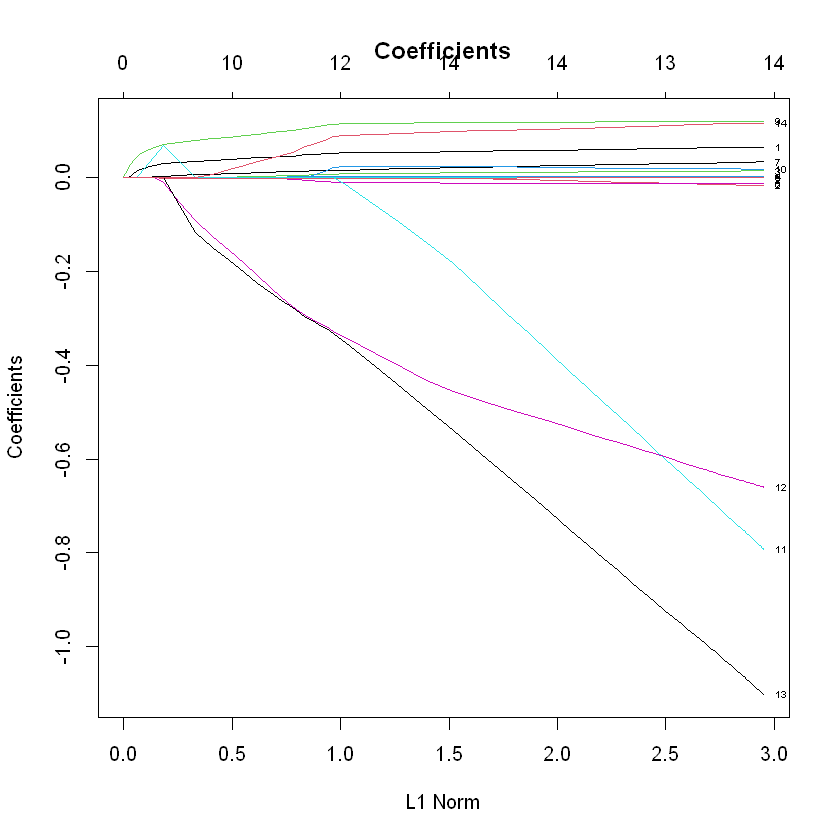

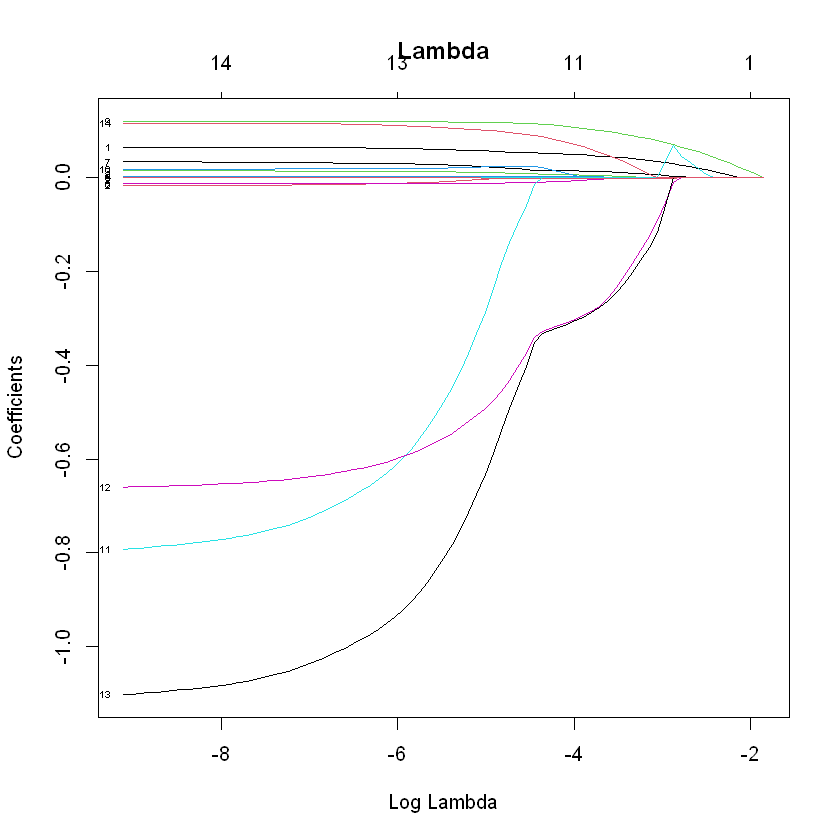

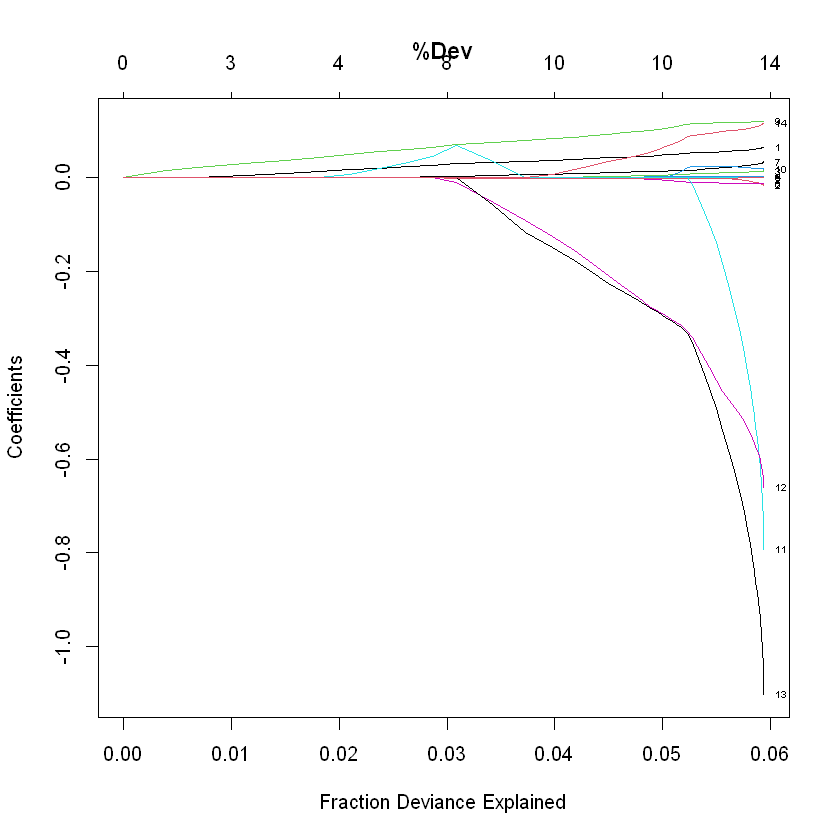

In [81]:
#plot the coefficients, lambda and % of deviance from output above
plot(lasso, label=TRUE, main = "Coefficients")
plot(lasso, xvar="lambda", label=TRUE, main = "Lambda")
plot(lasso, xvar = "dev", label = TRUE, main = "%Dev")
#https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html

The second graph demonstrates the effects of lasso, showing how the coefficients of multiple variables
converge to zero as lambda (our hyperparameter) increases.

We will look at the coefficients of our model when lambda is set at 0.000111 (which is where the model
stopped at step 79).

In [82]:
coef(lasso,s=0.000111)

15 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept) -1.0992535624
X            0.0650731914
Y           -0.0171625913
FFMC         0.0144457544
DMC          0.0015119044
DC           0.0005641902
ISI         -0.0135063916
temp         0.0336340414
RH           0.0005838778
wind         0.1199135210
rain         0.0167049754
autumn      -0.7925604963
spring      -0.6597869641
summer      -1.1020569482
weekend      0.1161105929

We can see that a lot of our variables shrink close to zero but we still have all of our variables. Given the
limited data, we can also use cross-validation to find the best lambda and best lasso model. Based on our
model above, we can also perform transform variables with low coefficients. In addition, we can also add in
some interactive terms that had low p-values from our linear regression model to improve our lasso model.

In [85]:
#convert relevant variables into a matrix
x_train2 <- model.matrix(log(area+1) ~X+Y+autumn+spring+summer+weekend+sqrt(FFMC)+
 sqrt(DMC)+sqrt(DC)+ISI+temp+sqrt(RH)+wind+rain, data = lasso_train)

In [86]:
set.seed(33)
cv.lasso <- cv.glmnet(x_train2, log(y+1), alpha = 1, nfolds = 10) #alpha = 1 runs lasso
print (cv.lasso)
#assign and print the best lambda
bestlam <- cv.lasso$lambda.min
bestlam


Call:  cv.glmnet(x = x_train2, y = log(y + 1), nfolds = 10, alpha = 1) 

Measure: Mean-Squared Error 

     Lambda Measure     SE Nonzero
min 0.09877   1.977 0.2047       3
1se 0.15726   1.982 0.2108       0


[1] 0.09876617

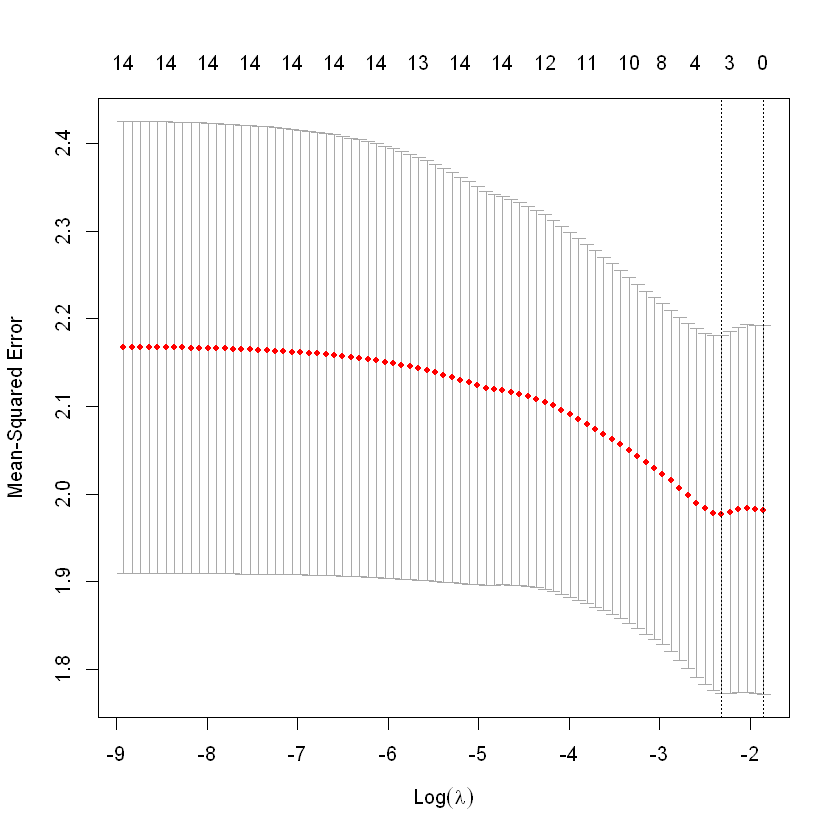

In [87]:
#plots log of lambda in relation to MSE
plot(cv.lasso)

In [88]:
#look at coefficients using best lambda
lasso.coef <- coef(cv.lasso, s = bestlam)
lasso.coef

16 x 1 sparse Matrix of class "dgCMatrix"
                      1
(Intercept) 0.772781436
(Intercept) .          
X           0.008828563
Y           .          
autumn      .          
spring      .          
summer      .          
weekend     .          
sqrt(FFMC)  .          
sqrt(DMC)   .          
sqrt(DC)    0.006271679
ISI         .          
temp        .          
sqrt(RH)    .          
wind        0.037597470
rain        .          

We can see the effects of lasso here. It has shrunk most of our coefficients to zero except for a few variables.
This tells us that there is a lot of noise in our data.

We will continue by adding some interactive terms in our model to see if they may be significant.


In [90]:
#convert relevant variables into a matrix
x_train3 <- model.matrix(log(area+1) ~X+Y+autumn+spring+summer+weekend+sqrt(FFMC)+sqrt(DMC)+sqrt(DC)+ISI+temp+sqrt(RH)
 +wind+rain+sqrt(DC):summer+Y:sqrt(DC)+X:sqrt(DC), data = lasso_train)

In [91]:
set.seed(33)
cv.lasso <- cv.glmnet(x_train3, log(y+1), alpha = 1, nfolds = 10) #alpha = 1 runs lasso
print (cv.lasso)
#assign and print best lambda
bestlam <- cv.lasso$lambda.min
bestlam


Call:  cv.glmnet(x = x_train3, y = log(y + 1), nfolds = 10, alpha = 1) 

Measure: Mean-Squared Error 

     Lambda Measure     SE Nonzero
min 0.09877   1.979 0.2028       4
1se 0.15726   1.986 0.2094       0


[1] 0.09876617

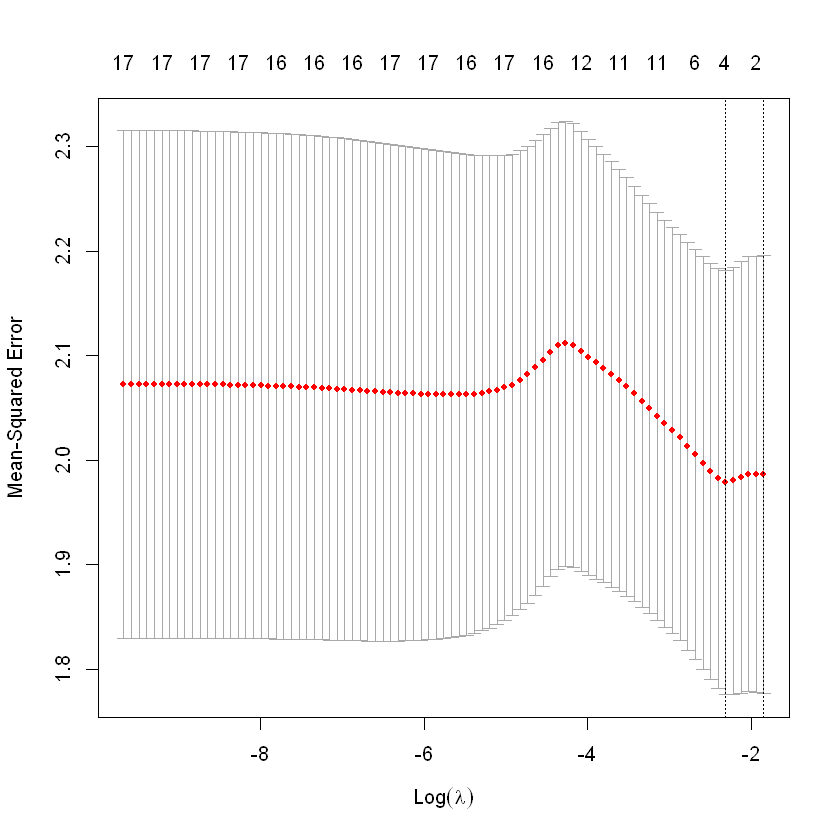

In [92]:
#plots log of lambda in relation to MSE
plot(cv.lasso)

In [93]:
lasso.coef <- coef(cv.lasso, s = bestlam)
lasso.coef

19 x 1 sparse Matrix of class "dgCMatrix"
                           1
(Intercept)     0.8065847341
(Intercept)     .           
X               .           
Y               .           
autumn          .           
spring          .           
summer          .           
weekend         .           
sqrt(FFMC)      .           
sqrt(DMC)       .           
sqrt(DC)        0.0001238463
ISI             .           
temp            .           
sqrt(RH)        .           
wind            0.0385455557
rain            .           
summer:sqrt(DC) .           
Y:sqrt(DC)      0.0012095054
X:sqrt(DC)      0.0002340517

We have four variables after applying the lasso technique. Two of these are interactive terms.

Using a union of our results from above, we can produce our final model below.

In [96]:
#convert relevant variables into a matrix
x_train4 <- model.matrix(log(area+1) ~X+Y+sqrt(DC)+wind+temp+Y:sqrt(DC)+X:sqrt(DC), data = lasso_train)

In [97]:
set.seed(33)
cv.lasso <- cv.glmnet(x_train4, log(y+1), alpha = 1, nfolds = 10) #alpha = 1 runs lasso
print (cv.lasso)
#assign and print best lambda
bestlam <- cv.lasso$lambda.min
bestlam


Call:  cv.glmnet(x = x_train4, y = log(y + 1), nfolds = 10, alpha = 1) 

Measure: Mean-Squared Error 

     Lambda Measure     SE Nonzero
min 0.00218   1.918 0.1970       7
1se 0.15726   1.986 0.2094       0


[1] 0.002177923

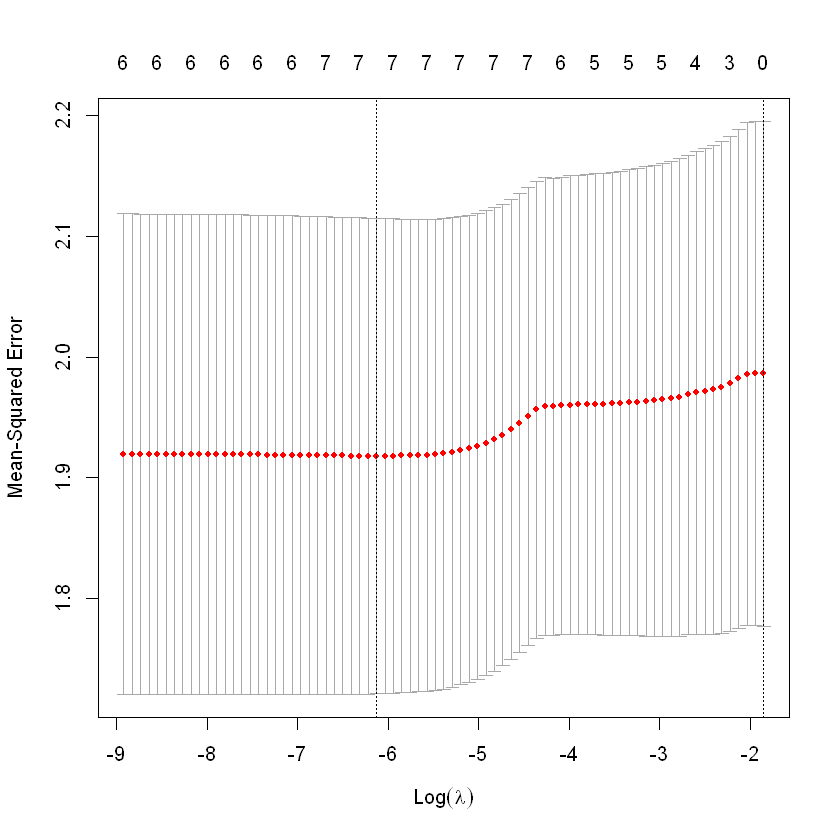

In [98]:
#plots log of lambda in relation to MSE
plot(cv.lasso)

In [99]:
#coefficients for our final model
lasso.coef <- coef(cv.lasso, s = bestlam)
lasso.coef

9 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)  0.1959737917
(Intercept)  .           
X            0.3923459313
Y           -0.4655709424
sqrt(DC)     0.0002595648
wind         0.1073192573
temp         0.0083444131
Y:sqrt(DC)   0.0210293090
X:sqrt(DC)  -0.0147565564

Our final variables for our lasso model include X , Y , sqrt(DC) , wind , temp , Y:sqrt(DC) and
X:sqrt(DC).

We can now insert these variables into our lasso model and evaluate how well it performs on the training
data. First, we will need to convert our selected variables into a matrix for the training and testing dataset.

In [100]:
#converting transformed variables into lists
sqrt_DC ='^'(lasso_train$DC,1/2)
sqrt_DC_test = '^'(lasso_test$DC,1/2)
X_DC = (('^'(lasso_train$DC,1/2))*lasso_train$X)
X_DC_test = (('^'(lasso_test$DC,1/2))*lasso_test$X)
Y_DC = (('^'(lasso_train$DC,1/2))*lasso_train$Y)
Y_DC_test = (('^'(lasso_test$DC,1/2))*lasso_test$Y)

In [101]:
#converting columns into a dataframe and matrix for assessment
mod_train_lasso<- data.frame(lasso_train$X,lasso_train$Y, lasso_train$wind,lasso_train$
temp,
 sqrt_DC, X_DC, Y_DC)
mod_x_train <- as.matrix(mod_train_lasso)
mod_test_lasso<- data.frame(lasso_test$X,lasso_test$Y, lasso_test$wind,lasso_test$temp,
 sqrt_DC_test, X_DC_test, Y_DC_test)
mod_x_test <- as.matrix(mod_test_lasso)

After transforming our columns into a matrix, we can evaluate our final result.

In [102]:
#apply lasso to final model with interactive and transformed terms
set.seed(33) #set seed for reproducibility
lasso1 <- glmnet(mod_x_train, log(y+1), family="gaussian", alpha = 1) #alpha = 1 runs lasso

In [103]:
#find best coefficients using best lambda
coef(lasso1,s=bestlam)

8 x 1 sparse Matrix of class "dgCMatrix"
                             1
(Intercept)       0.1959812055
lasso_train.X     0.3928530441
lasso_train.Y    -0.4662710435
lasso_train.wind  0.1073171777
lasso_train.temp  0.0083408860
sqrt_DC           0.0002272804
X_DC             -0.0147744023
Y_DC              0.0210635959

Above, we can see ourcoefficients for the lasso model.

Lastly, we can evaluate our model based on RMSE and R^2 metrics. We will be using the best lambda
(found during cross-validation).

In [104]:
eval_results <- function(true, predicted, df) {
SSE <- sum((predicted - true)^2)
SST <- sum((true - mean(true))^2)
R_square <- 1 - SSE / SST
RMSE = sqrt(SSE/nrow(df))
# Model performance metrics
data.frame(
 RMSE = RMSE,
 MSE = (RMSE)^2,
 Rsquare = R_square
) }

In [105]:
# Predict and evaluate training data
predictions_train <- predict(lasso1, s = bestlam, newx = mod_x_train)
eval_results(log(y+1), predictions_train, lasso_train)

RMSE,MSE,Rsquare
<dbl>,<dbl>,<dbl>
1.357739,1.843456,0.06203463


In [106]:
# Predict and evaluate testing data
predictions_test <- predict(lasso1, s = bestlam, newx = mod_x_test)
eval_results(log(y_test+1), predictions_test, lasso_test)

RMSE,MSE,Rsquare
<dbl>,<dbl>,<dbl>
1.425517,2.032098,-0.07118239


##### Final Result:
Our final MSE from lasso, after performing shrinkage techniques, is 2.03 with an R^2 of 0.062 for the training
data set

##### Random Forest
For my third model, we will use Random Forest to select features and model the data, as it is generally easy
to interpret and provides a good predictive performance (Dubey, 2018). Random Forest is a machine learning
algorithm with a low overfit. It looks at the importance of each feature and assesses how 'pure' each category
is (Dubey, 2018). This model is different to our first two models, so it would be interesting to see if we get
similar results. It also does not assume normality of features and utilises the bootstrapping technique. As this
is the case, we will not transform any of our features to start off with.

https://www.datasciencecentral.com/profiles/blogs/choosing-features-for-random-forests-algorithm
(https://www.datasciencecentral.com/profiles/blogs/choosing-features-for-random-forests-algorithm)
https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f
(https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f)

We will begin by loading the data, setting the seed to make the data reproducible and splitting the data into
training and testing data sets.

We will assign the randomly split training and testing datasets and use the randomForest library.

In [107]:
#assign the same training and testing dataset for all other models
rf_fires_train <- fires_train
rf_fires_test <- fires_test

In [108]:
set.seed(33) #set the seed to make the data reproducible
#model rf with all features
rf_fit=randomForest(area~., data=rf_fires_train)
rf_fit


Call:
 randomForest(formula = area ~ ., data = rf_fires_train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 5155.724
                    % Var explained: -6.63

The information above us tells us that the random forest was generated by 500 different trees. We have an
extremely high mean squared error and a negative variance explained. This tells us that we need to reassess our model. We can fit the model again using the log(area+1) to see if there is any improvement.

In [109]:
rf_fit <- randomForest(log(area+1)~., data=rf_fires_train)
rf_fit



Call:
 randomForest(formula = log(area + 1) ~ ., data = rf_fires_train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 2.162656
                    % Var explained: -10.04

We can see a huge improvement after transforming the target variable. Our mean of squared residuals has
dropped dramatically.

We can look at doing feature selection with random forest to improve our results.

,IncNodePurity
X,58.511974
Y,44.047671
FFMC,61.944933
DMC,81.992597
DC,76.837285
ISI,67.909350
temp,111.001943
RH,87.512673
wind,74.267559
rain,1.537366


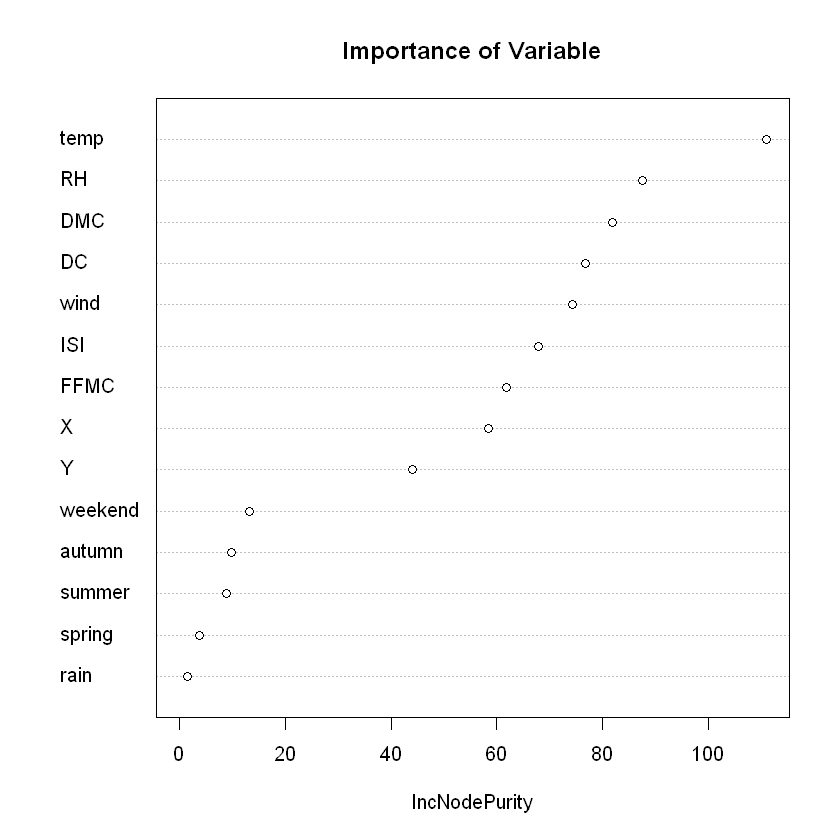

In [110]:
(VI_F=importance(rf_fit)) #show node purity for each variable
varImpPlot(rf_fit, scale =T, main = "Importance of Variable") #plot variables in order of importance

This tells us how to choose the best splits based on the loss function. From our visualisation above, our
model benefits from splitting on the temp variable first. We can use the first nine variables and check the
MSE and % of variance explained.

In [112]:
set.seed(33)
#model rf again with different subset of features
rf_fit1 <- randomForest(log(area+1)~ temp+RH+DMC+DC+wind+ISI+FFMC+X+Y, data=rf_fires_train)
rf_fit1


Call:
 randomForest(formula = log(area + 1) ~ temp + RH + DMC + DC +      wind + ISI + FFMC + X + Y, data = rf_fires_train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 2.128135
                    % Var explained: -8.28

There is only a minor improvement in the mean of squared residuals and percentage of variance explained.

,IncNodePurity
temp,123.24559
RH,94.54458
DMC,89.98396
DC,83.37563
wind,77.96237
ISI,75.00536
FFMC,65.37878
X,61.87730
Y,47.12987


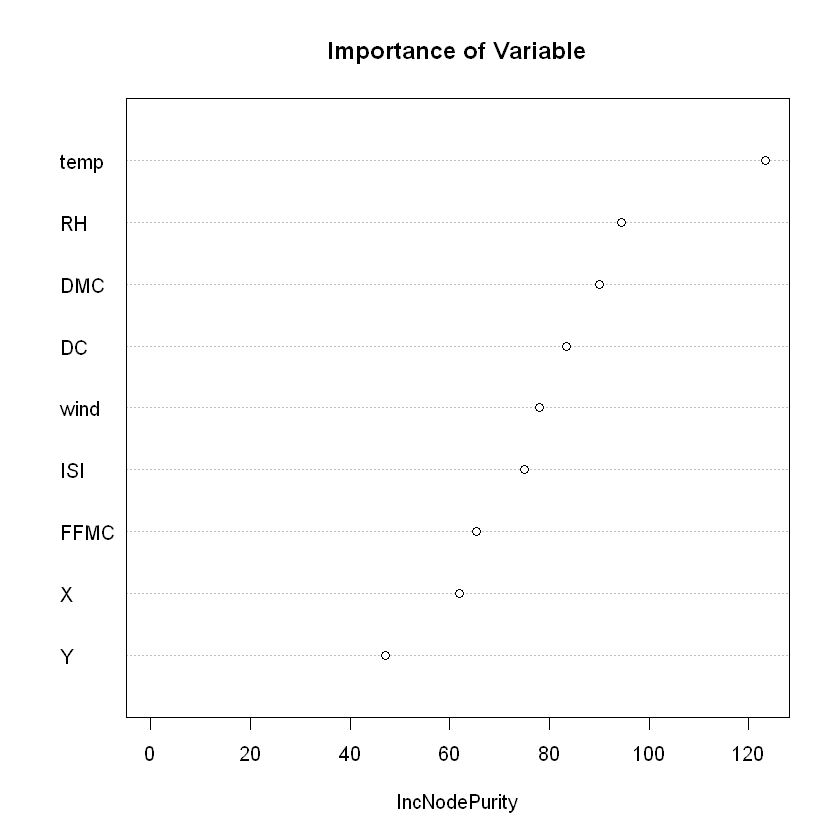

In [113]:
(VI_F=importance(rf_fit1)) #show node purity for each variable
varImpPlot(rf_fit1, scale =T, main = "Importance of Variable") #plot importance of variables

We will continue performing variable selection by testing out our significant transformed and interactive
variables found in the previous two models.

In [114]:
#model rf again with different subset of features
rf_fit2 <- randomForest(log(area+1)~ wind +X+Y+sqrt(rf_fires_train$DC)+summer+temp+sqrt
(rf_fires_train$DC):X+
 autumn+sqrt(rf_fires_train$DC):summer+sqrt(rf_fires_train$DMC)+
sqrt(rf_fires_train$DC):Y,
 data=rf_fires_train)
rf_fit2



Call:
 randomForest(formula = log(area + 1) ~ wind + X + Y + sqrt(rf_fires_train$DC) +      summer + temp + sqrt(rf_fires_train$DC):X + autumn + sqrt(rf_fires_train$DC):summer +      sqrt(rf_fires_train$DMC) + sqrt(rf_fires_train$DC):Y, data = rf_fires_train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 2

          Mean of squared residuals: 2.058174
                    % Var explained: -4.72

,IncNodePurity
wind,95.01338
X,74.63795
Y,55.50518
sqrt(rf_fires_train$DC),113.47126
summer,11.52735
temp,147.00661
autumn,12.17966
sqrt(rf_fires_train$DMC),119.31131


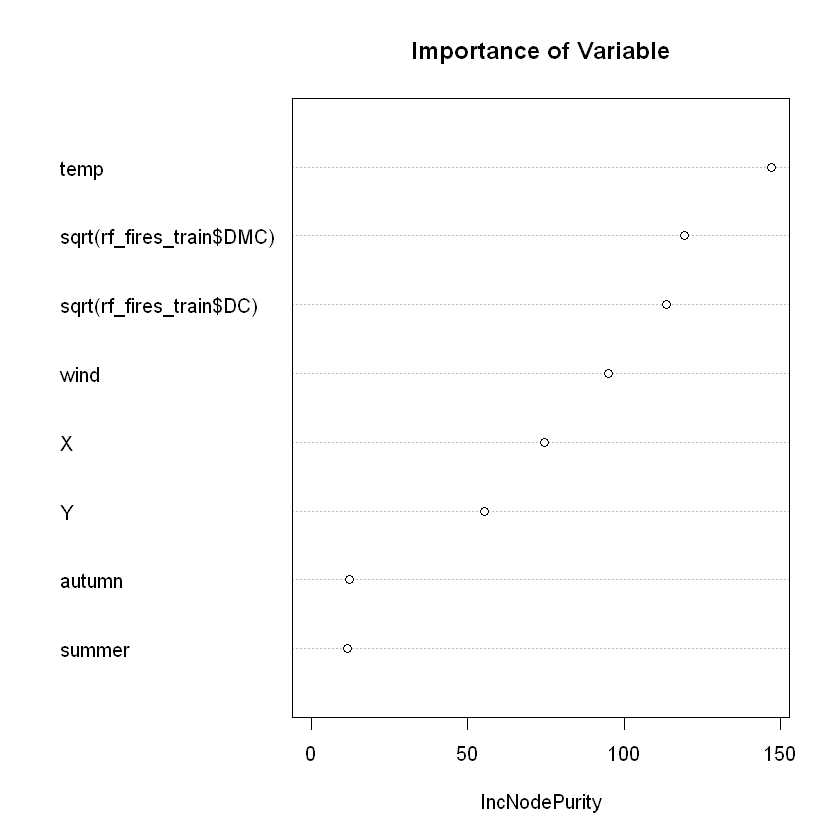

In [115]:
(VI_F=importance(rf_fit2)) #show node purity for each variable
varImpPlot(rf_fit2, scale =T, main = "Importance of Variable") #plot importance of variables


temp is the most important variable from both of our models. The mean squared error only shows a minor
improvement. We can use the mlbench and caret library to further analyse our results and pick the most
favourable variables.

In [117]:
#install.packages("mlbench")
set.seed(33)
control<-rfeControl(functions=rfFuncs, method="cv", number=10) #use caret package
#cross validation technique used to perform feature selection
results1 <- rfe(rf_fires_train[,2:15], log(rf_fires_train$area+1), sizes=c(1:14), rfeControl=control)
print(results1)



Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables  RMSE Rsquared   MAE  RMSESD RsquaredSD   MAESD Selected
         1 1.513 0.037255 1.190 0.11138   0.036965 0.06580         
         2 1.478 0.016748 1.170 0.10169   0.016408 0.07673         
         3 1.462 0.017204 1.166 0.08449   0.020382 0.04463         
         4 1.430 0.014372 1.162 0.13841   0.013707 0.05469        *
         5 1.435 0.009263 1.165 0.13317   0.009344 0.06236         
         6 1.485 0.015302 1.187 0.12462   0.016136 0.08050         
         7 1.479 0.014620 1.190 0.11888   0.017526 0.07090         
         8 1.467 0.019929 1.184 0.12385   0.022469 0.07334         
         9 1.467 0.015401 1.187 0.10395   0.009006 0.05400         
        10 1.465 0.011047 1.186 0.10891   0.007022 0.05552         
        11 1.451 0.010381 1.183 0.11308   0.008266 0.05853         
        12 1.453 0.010812 1.183 0.11467   0.011409 0.06054 

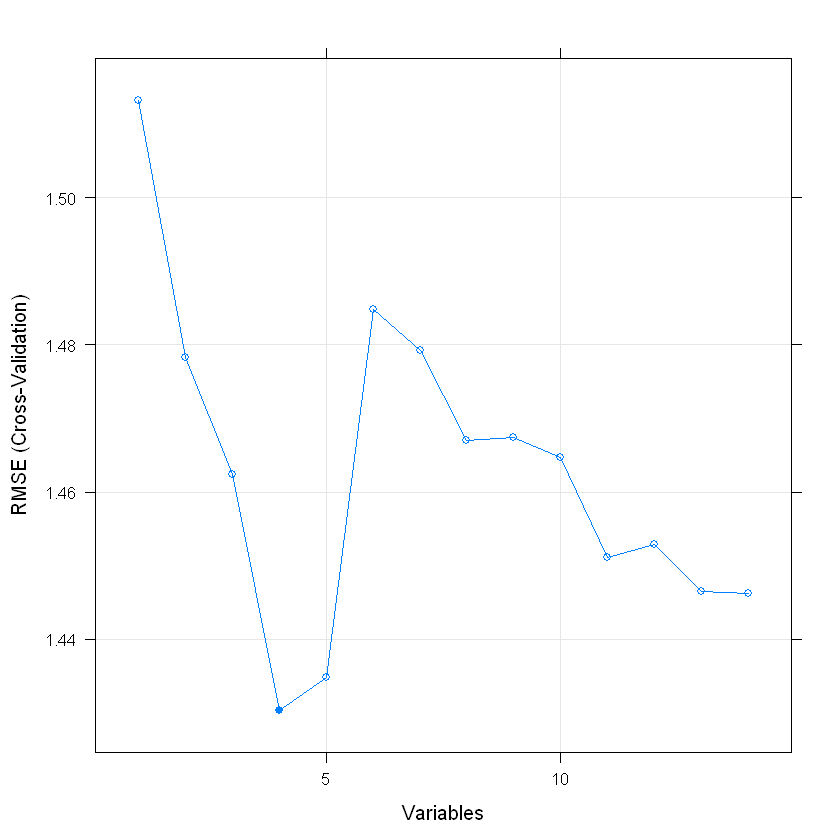

In [118]:
#plot to find optimum number of features
plot(results1, type=c("g", "o"))

In [119]:
set.seed(33)
control<-rfeControl(functions=rfFuncs, method="cv", number=10) #use caret package
#cross validation technique used to perform feature selection
results2 <- rfe(mod_train_lasso, log(rf_fires_train$area+1), sizes=c(1:14), rfeControl=
control)
print(results2)


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables  RMSE Rsquared   MAE RMSESD RsquaredSD   MAESD Selected
         1 1.558  0.03648 1.184 0.1604    0.04575 0.10234         
         2 1.483  0.03596 1.137 0.1629    0.04227 0.08946         
         3 1.485  0.02453 1.153 0.1348    0.02039 0.08133         
         4 1.455  0.01365 1.140 0.1286    0.01148 0.05935         
         5 1.424  0.03475 1.117 0.1351    0.03028 0.06825        *
         6 1.451  0.02128 1.139 0.1182    0.02022 0.05014         
         7 1.441  0.01880 1.142 0.1111    0.01884 0.04682         

The top 5 variables (out of 5):
   X_DC, sqrt_DC, Y_DC, lasso_train.X, lasso_train.temp



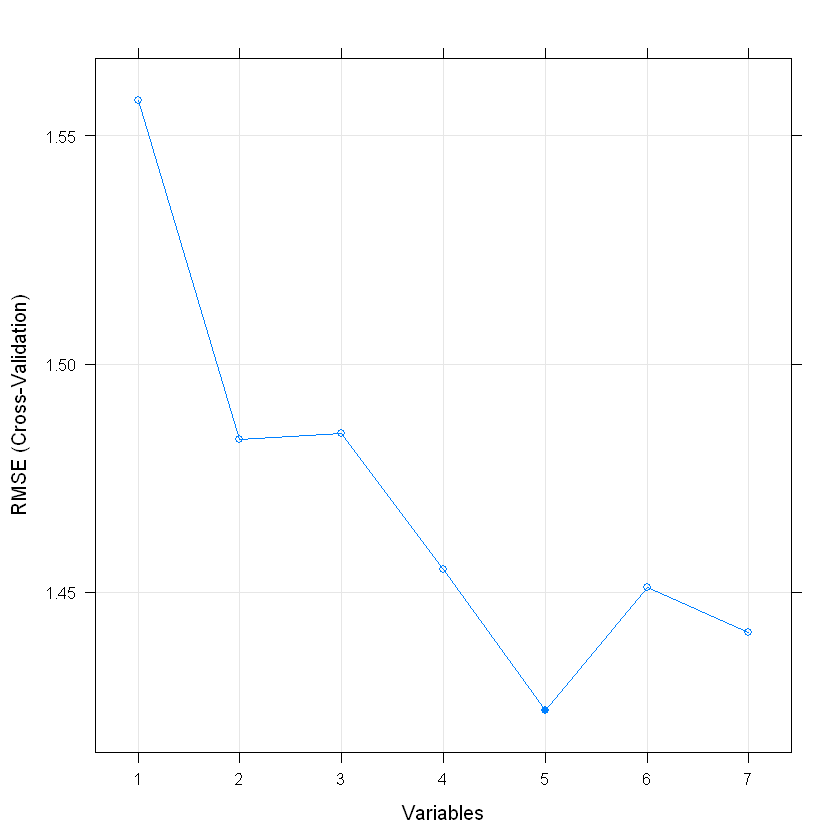

In [120]:
#plot optimal number of variables
plot(results2, type=c("g", "o"))


We can see that the results above have some variables in common.

We will use the transformed variables for DMC and DC in our final model. In addition, we will try to add
Y:DC and X:DC to see if this improves the mean of squared residuals.

In [122]:
set.seed(33)
#model rf again with different subset of variables
rf_fit3=randomForest(log(area+1)~ sqrt(rf_fires_train$DMC)+sqrt(rf_fires_train$DC)+summer+temp+X,
 data=rf_fires_train)
rf_fit3



Call:
 randomForest(formula = log(area + 1) ~ sqrt(rf_fires_train$DMC) +      sqrt(rf_fires_train$DC) + summer + temp + X, data = rf_fires_train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 1.96794
                    % Var explained: -0.13

In [123]:
set.seed(33)
#model rf again with different subset of variables
rf_fit4=randomForest(log(area+1)~ sqrt(rf_fires_train$DMC)+sqrt(rf_fires_train$DC)+summer+temp+X+Y:DC+X:DC,
 data=rf_fires_train)
rf_fit4



Call:
 randomForest(formula = log(area + 1) ~ sqrt(rf_fires_train$DMC) +      sqrt(rf_fires_train$DC) + summer + temp + X + Y:DC + X:DC,      data = rf_fires_train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 2

          Mean of squared residuals: 2.092365
                    % Var explained: -6.46

There is no improvement in the mean of squared residuals and we are increasing the complexity of our
model with no performance gain. We will remove the interactive terms for our final model and evaluate
rf_fit3.

In addition, we can look at the number of trees vs. error to make sure we are generating the right number of
trees by identifying the optimal point for trees and MSE.

,IncNodePurity
sqrt(rf_fires_train$DMC),89.00107
sqrt(rf_fires_train$DC),83.80432
summer,11.51511
temp,97.94851
X,52.10594


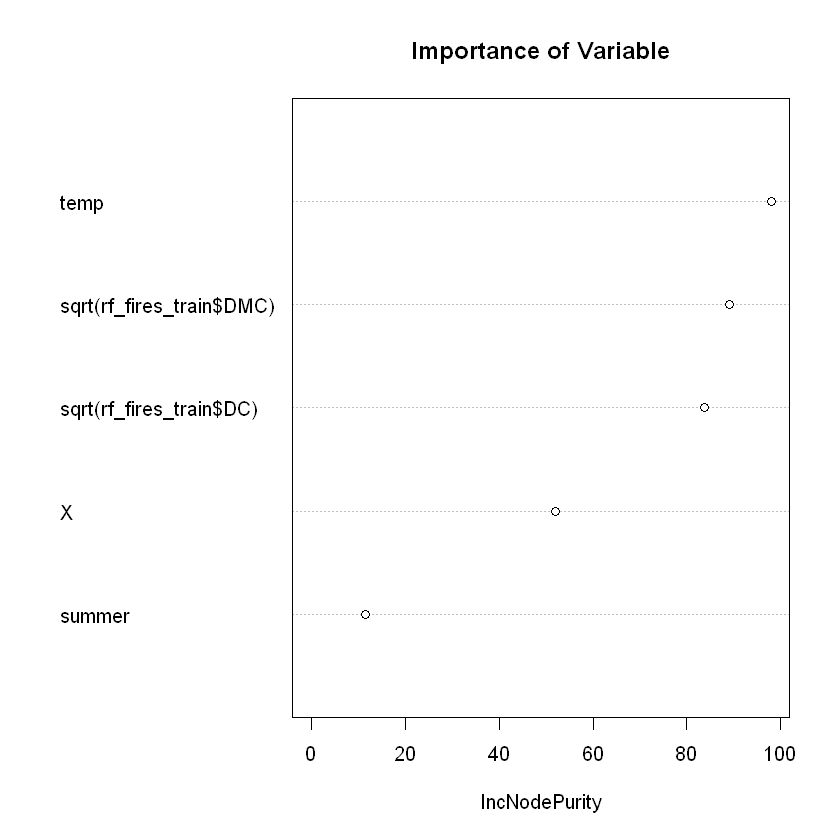

In [124]:
(VI_F=importance(rf_fit3)) #show node purity for each variable
varImpPlot(rf_fit3, scale =T, main = "Importance of Variable") 

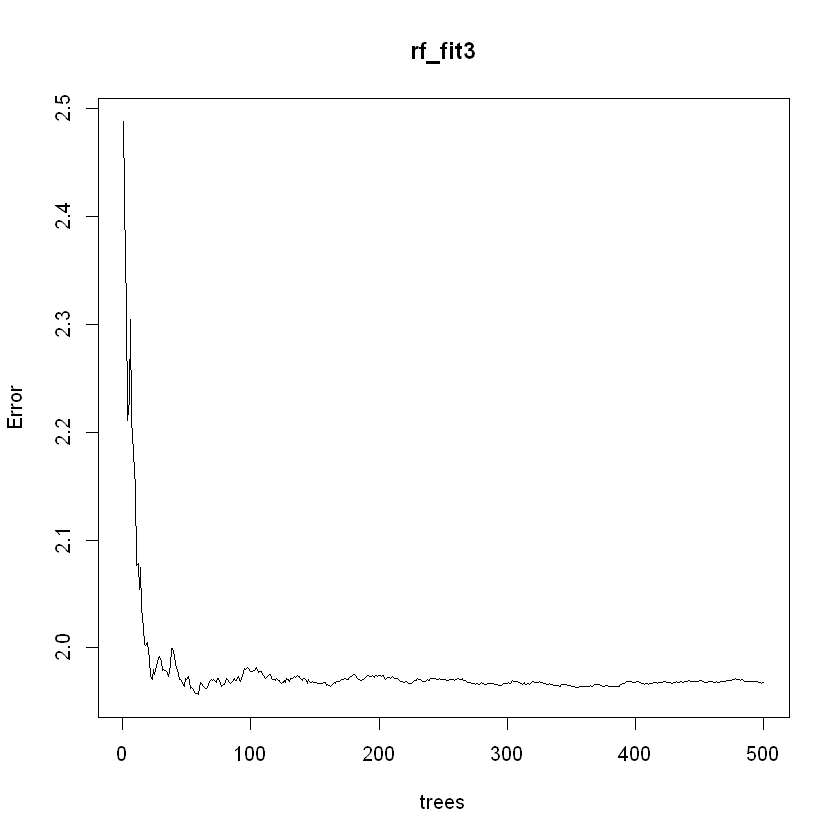

In [125]:
#plot the optimum number of trees to minimise error
plot(rf_fit3)


In [126]:
#calculate number of trees for lowest MSE
which.min(rf_fit3$mse)


[1] 59

Given 59 has been specified as the optimal number of trees, we can see if this will make a difference when
we fit the model again.


In [128]:
#refit model with number of trees
set.seed(33)
rf_fit3=randomForest(log(area+1)~ sqrt(rf_fires_train$DMC)+sqrt(rf_fires_train$DC)+summer+temp+X,
 data=rf_fires_train, ntree = 59) #specify 59 as number of trees
rf_fit3



Call:
 randomForest(formula = log(area + 1) ~ sqrt(rf_fires_train$DMC) +      sqrt(rf_fires_train$DC) + summer + temp + X, data = rf_fires_train,      ntree = 59) 
               Type of random forest: regression
                     Number of trees: 59
No. of variables tried at each split: 1

          Mean of squared residuals: 1.956643
                    % Var explained: 0.44

There is a bit of improvement on the mean of squared residuals and percentage of variance explained but
not much.

In addition, we can look at the MSE and R^2.

In [129]:
#calculate MSE and R^2
mean(rf_fit3$mse)
mean(rf_fit3$rsq)

[1] 2.034782

[1] -0.03531355

Lastly, we can use this model on our test dataset and find the MSE

In [130]:
#fit rf on test dataset
set.seed(33)
rf_fit5=randomForest(log(area+1)~ sqrt(rf_fires_test$DMC)+sqrt(rf_fires_test$DC)+summer
+temp+X,
 data=rf_fires_test, ntree = 59) #specify 59 as number of trees
rf_fit5


Call:
 randomForest(formula = log(area + 1) ~ sqrt(rf_fires_test$DMC) +      sqrt(rf_fires_test$DC) + summer + temp + X, data = rf_fires_test,      ntree = 59) 
               Type of random forest: regression
                     Number of trees: 59
No. of variables tried at each split: 1

          Mean of squared residuals: 2.20939
                    % Var explained: -16.46

In [131]:
#predict and calculate R^2 and MSE
rf_pred <- predict(rf_fit5, newdata = rf_fires_test)
rf.resid = rf_pred - (log (rf_fires_test$area +1))#calculate error
mean(rf.resid^2)

[1] 0.9585388

In [132]:
mean(rf_fit5$rsq)

[1] -0.1736272

##### Final Result:
Our final MSE from random forest, after using random forest to pick the more favourable variables, is 0.9585.
However, we have a negative R^2 of -0.03 for our training dataset.

### 4. Model Comparsion
We chose to model our dataset using three different approaches – multiple linear regression, lasso and
random forest. This was in respect to the ‘no free lunch in statistics’ principle, where no single method is
superior to all others for all possible data sets. By using three different models, we hoped to learn more about
our dataset and find variables of importance. Mean squared error was the metric used to compare all three of
our models. If MSE is small, we know that our true responses and predicted responses are close. Our goal
was to achieve a small MSE for each model. In addition to considering the MSE, we also need to keep in
mind the importance of the complexity vs. performance of a model. While a low MSE is desirable, it should
be justified. For example: increasing the complexity should result in an obvious increase in performance. If
the increase in performance is very minimal, we need to assess whether adding in extra variables was
justified. Before developing the models, we also split our dataset in training and testing sets.

#### Multiple Linear Regression
We decided to choose multiple linear regression as our first model as we thought it was a good place to start.
Although it is inflexible, it is easy to interpret and we can evaluate our data based on a lot of metrics. It is a
simple approach to predict a quantitative response – in this case area.

For this model, we focused on p-value to look at whether each variable had a substantial association with our
target variable. As a small p-value infers an association, we used this metric for our feature selection. We
started by using the lm function to our target variable log(area+1) and regressed this over all of our
original (untransformed variables). However, we know that models generally make better assumptions when
the data is normally distributed with limited noise (Radecic, 2020). Because of this, we used some of the
improved, transformed variables based on our exploratory data analysis. This yielded a higher adjusted R^2
and F-statistic. In addition, we achieved a lower p-value, which told us that the transformed variables had a
stronger association with our target variable. Because of this, we decided to continue with our transformed
variables. We chose stepwise selection (forward, backward and bi-directional) to find the most significant
variables in helping predict the area burned. Our correlation matrix from EDA helped us to understand
relations between certain variables. However, given stepwise had the ability to filter out insignificant
variables, we decided to create a model with all of our variables and all of their interactive terms. This
resulted in a model with over 100 variables.

Given our large number of variables, we did not use best subset selection given the large p as it would
have been computationally inefficient. Instead, we used stepwise to decide which attributes were most
significant in helping to predict log(area+1).

The limitation to forward and backward selection is that it does not guarantee the best set of variables. This is
why we have also decided to include bi-directional, given this acts similar to best subset selection but is
much more computationally efficient.

In our case, bi-directional delivered the best model in terms of adjusted R^2, residual standard error and Fstatistic. We focused on adjusted R^2 rather than multiple R^2, as it penalises any unnecessary variables in
our model. Generally, multiple R^2 increases with the number of variables – even if these variables have a
weak relation with the predictor. In addition, the residual standard error was looked at as it tells us the lack of
fit of the model to our data.

After performing forward, backward and bi-directional step selection, we looked at the union of significant
features from these three models. In addition, we also considered the AIC score of each model, the adjusted
R^2 and p-value. We focused on AIC in this case as it takes into account model performance and model
complexity. After some analysis, we created one final model based on the common attributes. We also
applied the hierarchy principle and ensured that any interactive term also included the individual term (even if
individual term was not significant).

For good measure, based on our final 11 variables, we used best subset selection to see if we could get rid
of any variables and still achieve a higher adjusted R^2 and lower Cp/BIC. Our final model achieved the
lowest p-value. We also assessed the final model for outliers or influential points to gain a better
understanding of the data. After performing analysis (notes above), we used the final model on our test
dataset and calculated the mean squared error.

In summary, multiple linear regression model is easily interpretable and simple to understand. It is easy to
see the coefficients for each variable. The lm function in R also allows us to see which variables are
significant from looking at the p-value. It also interprets important statistics for us such as the Residual
Standard Error, adjusted R^2 and F-statistic. The disadvantage of linear regression is that most problems in
reality are not linear. Given we are using real-world data to predict area , it has limitations in terms of
predictive power. Despite achieving a very low MSE, we do not achieve a high adjusted R^2. This measure
tells us how our model fits the line. Given the adjusted R^2 is not very high, our future predictions for area
burned may not be very accurate. Ideally, for this task, we should also use additional criteria earlier on such
as BIC, cp and RSS to find a better model.

#### Lasso
Next, we used lasso to relax some of the linearity assumptions. Even though in essence it is still a linear
model, we can try to improve from the multiple linear regression model by reducing complexity and minimise
variance. Lasso, like ridge, is a regularisation technique. We chose lasso over ridge as it has the power to
shrink coefficients towards zero and create a sparser model. Lasso works by shrinking coefficients by a
constant amount toward zero. While neither lasso nor ridge regression will universally outperform the other,
lasso is more interpretable, performs better with noise and is simpler. Another advantage of lasso is that it
works similar to best subset selection when performing variable selection.

Lasso uses metrics such as deviance, which plays a similar role to RSS. The percentage of deviance
explained essentially tells us the goodness-of-fit for the model. This is measured against lambda. The optimal
point is when there ceases to be a big change in the percentage of deviance in relation to lambda.

We used our hyperparameter lambda to shrink unrelated coefficients in our data to zero. This will help us to
identify a subset of important predictors for our model. For this model, choosing a good value for lambda is
imperative. We used cross validation to ensure we found the optimal value for lambda. We can then look at
where the cross-validation error is smallest in order to select our parameter value. Our model is then re-fitted
using the optimal lambda value and the favourable variables.

#### Random Forest
Lastly, we chose random forest as our last model given it has a good predictive performance and low overfit.
This was important given we noticed noise in our data when performing EDA. It also does not assume
normality of features and uses a bootstrapping technique, which is great given our limited data. Random
forest is built on many decisions trees, which split on a random subset of features (Kho, 2018).

The randomForest library allows us to perform regression on our dataset. Given that normality is not
assumed, we started by regressing all target variables over the original predictor area . The randomForest
library gave us statistics such as the number of trees, number of variables at each split, the mean of squared
residuals and percentage of variance explained (in other words, R^2). The mean squared residuals is a
metric that is similar to MSE, which looks at how well our model fits our training data. We focused on the
mean of squared residuals and percentage of variance in order to select our variables and final model.

After regressing all of our original input variables over the target variable, we get an extremely high mean of
squared residuals. We also have a negative percentage of variance explained. This tells us that a horizontal
line would perform better than our current model. After changing our target variable to log(area+1),
we see a huge improvement in the mean of squared residuals. However, the percentage of variance explained
was much worse.

We can graph the purity of each node and focus on the importance of each variable. Using a systematic
approach, we can test how much our model will improve or worsen when we remove, add or transform
variables using the metrics mean of squared residuals and % of variance explained . We also
added some significant interactive terms discovered from our previous two models to see if this can improve
our random forest model.

Finally, we used the caret library in R. This library allows us to insert the data and selects the top variables
and the number of variables we should select in order to achieve a low RMSE. RMSE is linked to MSE,
which is our primary point of comparison. For this task, I used the caret library for two datasets – the
original dataset, and one with transformed and interactive terms. If there were commonalities in the variables,
I would use this to produce the final model. In the end, we were able to produce a model with a positive % of
variance explained (even though it was only 0.44) and a low mean of squared residuals.

Advantages of random forest is that generally the likelihood of overfitting is reduced. This is good as when
we performed EDA to find the correlation between each variable and our target variable, we noticed that the
variables did not necessarily have a linear relation with area . Random forest provides a more robust
alternative to dealing with non-linear data and outliers/influential points (Kho, 2016). It is also great when it
comes to unbalanced data. If we were to only use Random Forest as our model, we would not need to
correct the imbalance of data in month for this assignment. One of the drawbacks from this model is that we
do not get coefficients. This makes it harder to interpret the model.

### Summary
To summarise our points above, each model has advantages and disadvantages. No model dominates all
other models for all datasets. This is why we chose three different models to learn which would perform best.
We started with linear regression as a simple model. This allowed us to analyse the significance of interactive
terms for use in future models. Lasso allowed us to loosen some linearity assumptions and create a sparser
model that was also easy to interpret. Given our low R^2 scores from linear and lasso, we used random
forest given its excellent predictive powers for imbalance and non-linear data.

Despite the different metrics used to select the most favourable variables, our models are compared on the
same metric. Our final MSE for linear regression was 0.00003, for lasso 2.03 and random forest 0.96. While
the small values of MSE above reflects a really good result, it does not mean our model is reliable and
correct in predictions. When we transformed area to log(area+1) , we dramatically reduced the range.
The area is also measured in hectares, which is 10,000 square metres. In order to accurately assess our
model, we would need to look into a way where we could convert the squared errors accurately to reflect the
inaccuracy. Given MSE is arbitrary, we can also look at the final R^2 score.

If we also look at R^2 of the training dataset, for linear regression our final adjusted R^2 was only 0.07. Lasso
had a recorded R^2 of 0.06 and random forest recorded the worse with -0.03 (despite a positive % of
deviance explained) for the same training dataset. Random forest also produced the least number of
variables, which could explain why it achieved the lowest score. In this case, R^2 provides a more reliable
metric for how our model would perform on new data.

### 5. Variable Identification and Explanation

In the end, we used the following variables for our three models to predict log(area+1)

Multiple Linear regression

(total of 11 variables)

- wind
- X
- Y
- sqrt(DC)
- summer
- temp
- autumn
- sqrt(DMC)
- X:sqrt(DC)
- sqrt(DC):summer
- Y:sqrt(DC)

Final model for lasso

(total of 7 variables)

- X
- Y
- sqrt(DC)
- wind
- temp
- X:sqrt(DC)
- Y:sqrt(DC)

Final model for random forest

(total of 5 variables)

- X
- sqrt(DMC)
- sqrt(DC)
- summer
- temp

To identify these variables, we used the same training and test dataset (split 80% train and 20% test) for all
three of our models. However, we used different statistical analysis to develop each model and select the
most significant variables.

For multiple linear regression, we used the p-value to discover the most significant features in our model. As
discussed above, a lower p-value tells us that there may be an association between our target variable and
input variable. In addition, we also looked at the adjusted R^2, RSE, F-statistic and AIC in particular in order
to develop the best model. A low AIC score was preferable, and it was a metric that measured not only the
model complexity but also the model performance. RSE told us the lack of fit and adjusted R^2 explained the
variance in our model while penalising any unnecessary variables. F-statistic took into account the degree of
freedom. The bigger our F-statistic the better, but it should be over 1. While not all of these stats improved at

each stage of the model development, we made sure that most of these stats reflected a better model. Using
p-value as our metric for the final model, we saw that the most significant values from our final model was X
and X:sqrt(DC).

For lasso, we used % of deviance explained and cross validation to choose the right lambda to shrink our
model in order to choose the best parameters. When choosing the right lambda, we focused on minimising
the mean squared error. It was interesting to note that lasso shrunk all of our coefficients at the start. After
adding some interactive terms, the model started to return coefficients of certain variables. This tells us that
perhaps we need additional rows and columns (variables) to predict the area burned. The more meaningful
variables we found were sqrt(DC) and wind as these variables remained while the others shrunk to zero.

Lastly, for random forest, we focused on the mean of squared residuals and the purity of each node to tell us
which variables were considered important. Additionally, we noted the % of variance explained, which started
off as a negative number. This told us that a horizontal line would fit the data better. We also used RMSE as
a metric to produce our final model. The caret package also used cross-validation to identify the optimal
number of variables and assess the improvement to our model based on metrics such as RMSE, R^2, MAE.
Random forest highly regarded temp as a significant variable based on the first split (highest node purity).

Even though we used different metrics to choose the variables for our final model, we can see an overlap of
three variables across all three models. These overlaps include X , sqrt(DC) and temp . This tells us that
even though we did not create a model that could predict the area burned very well, these 3 variables may

### 6. Conclusion
For this project, we used three different machine learning approaches in order to try and predict the burned area
of bushfires using real data. In order to build our three models, we also used different techniques and metrics
to develop our model to predict the burned area accurately. We have also explained the significant variables
that we believe contributed to the burned area. Overall, our most significant variables were X , sqrt(DC)
and temp . For consistency purposes, we used MSE as the metric to compare the same test dataset used
across our three models. At the end of this task, we found that the model with the lowest MSE was multiple
linear regression. However, despite a low MSE, we know that all of our models could improve given all three
models produced a low R^2. Perhaps, in future, we could consider more complex models such as
Generalized Additive Models or Gradient Boosting, or alternatively build on our models by using additional
packages such as metaforest . We could also benefit from additional data or additional variables in the
dataset given the weak correlation found among the majority of our input variables.